In [44]:
import pandas as pd  
all_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_pull_request.parquet")
all_repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_repository.parquet")
all_user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_user.parquet")

In [45]:
# Basic
pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/repository.parquet")
user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/user.parquet")

# Comments and reviews
pr_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_comments.parquet")
pr_reviews_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_review_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_review_comments.parquet")

# Commits
pr_commits_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")

# Related issues
related_issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")
issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/issue.parquet")

# Events
pr_timeline_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_timeline.parquet")

# Task type
pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_task_type.parquet")

# Human-PR
human_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pull_request.parquet")
human_pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pr_task_type.parquet")

# Dataset Size Metrics and Distribution Analysis

## Analysis Plan

This notebook provides a comprehensive analysis of the AIDev dataset covering:

### 1. Size Metrics (Section 1.5.2)
- **Entity Counts**: Number of all entities in the dataset
  - Pull Requests (PRs)
  - Repositories 
  - Users/Authors
  - Issues
  - Comments (PR comments, review comments)
  - Reviews
  - Commits and commit details
  - Timeline events
  
- **Project Metrics**: Repository-level statistics
- **Commit & Patch Metrics**: Code change statistics
- **Author Metrics**: Developer participation
- **File/Blob Metrics**: File-level statistics including:
  - Number of unique files
  - File sizes (additions, deletions, total changes)
  - Lines of code metrics
  
- **Vocabulary Metrics**: Unique tokens in text fields
- **Summary Statistics**: Comprehensive stats for each entity type

### 2. Distribution Visualizations (Section 1.5.3)
- Boxplots, violin plots, and histograms for:
  - Pull request distributions
  - Commit distributions
  - Review and comment distributions
  - File change distributions
  - User activity distributions
  - Repository metrics distributions


In [46]:
# Import additional libraries for analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Size Metrics Analysis

### 1.1 Entity Counts


In [47]:
# Calculate entity counts
entity_counts = {
    'Pull Requests': len(pr_df),
    'Repositories': len(repo_df),
    'Users': len(user_df),
    'Issues': len(issue_df),
    'PR Comments': len(pr_comments_df),
    'PR Reviews': len(pr_reviews_df),
    'PR Review Comments': len(pr_review_comments_df),
    'PR Commits': len(pr_commits_df),
    'PR Commit Details (File-level changes)': len(pr_commit_details_df),
    'Related Issues': len(related_issue_df),
    'PR Timeline Events': len(pr_timeline_df),
    'PR Task Types': len(pr_task_type_df),
    'Human PRs': len(human_pr_df),
    'Human PR Task Types': len(human_pr_task_type_df)
}

# Create a summary dataframe
entity_summary = pd.DataFrame(list(entity_counts.items()), 
                              columns=['Entity Type', 'Count'])
entity_summary['Count'] = entity_summary['Count'].apply(lambda x: f"{x:,}")

print("="*60)
print("DATASET ENTITY COUNTS")
print("="*60)
print(entity_summary.to_string(index=False))
print("="*60)

# Calculate total entities
total_entities = sum([len(pr_df), len(issue_df), len(pr_comments_df), 
                     len(pr_reviews_df), len(pr_review_comments_df),
                     len(pr_commits_df), len(pr_timeline_df)])
print(f"\nTotal Entities (PRs + Issues + Comments + Reviews + Commits + Events): {total_entities:,}")


DATASET ENTITY COUNTS
                           Entity Type   Count
                         Pull Requests  33,596
                          Repositories   2,807
                                 Users   1,796
                                Issues   4,614
                           PR Comments  39,122
                            PR Reviews  28,875
                    PR Review Comments  19,450
                            PR Commits  88,576
PR Commit Details (File-level changes) 711,923
                        Related Issues   4,923
                    PR Timeline Events 325,500
                         PR Task Types  33,596
                             Human PRs   6,618
                   Human PR Task Types   6,618

Total Entities (PRs + Issues + Comments + Reviews + Commits + Events): 539,733


### 1.2 Author/People Metrics


In [48]:
# Calculate author statistics
pr_authors = set(pr_df['user'].dropna().unique())
commit_authors = set(pr_commits_df['author'].dropna().unique())
commit_committers = set(pr_commits_df['committer'].dropna().unique())
reviewers = set(pr_reviews_df['user'].dropna().unique())
commenters = set(pr_comments_df['user'].dropna().unique())
timeline_actors = set(pr_timeline_df['actor'].dropna().unique())

# All unique people
all_people = pr_authors | commit_authors | commit_committers | reviewers | commenters | timeline_actors

print("="*60)
print("AUTHOR/PEOPLE METRICS")
print("="*60)
print(f"Total Unique Users in User Table: {len(user_df):,}")
print(f"Unique PR Authors: {len(pr_authors):,}")
print(f"Unique Commit Authors: {len(commit_authors):,}")
print(f"Unique Commit Committers: {len(commit_committers):,}")
print(f"Unique Reviewers: {len(reviewers):,}")
print(f"Unique Commenters: {len(commenters):,}")
print(f"Unique Timeline Actors: {len(timeline_actors):,}")
print(f"Total Unique People Across All Activities: {len(all_people):,}")
print("="*60)


AUTHOR/PEOPLE METRICS
Total Unique Users in User Table: 1,796
Unique PR Authors: 1,797
Unique Commit Authors: 2,781
Unique Commit Committers: 2,377
Unique Reviewers: 2,535
Unique Commenters: 2,353
Unique Timeline Actors: 7,493
Total Unique People Across All Activities: 8,477


### 1.3 Files/Blobs Metrics


In [54]:
# Calculate file/blob metrics from commit details
unique_files = pr_commit_details_df['filename'].nunique()
total_file_changes = len(pr_commit_details_df)

# Calculate line statistics
total_additions = pr_commit_details_df['additions'].sum()
total_deletions = pr_commit_details_df['deletions'].sum()

# Calculate total_changes if it doesn't exist
if 'total_changes' not in pr_commit_details_df.columns:
    pr_commit_details_df['total_changes'] = pr_commit_details_df['additions'] + pr_commit_details_df['deletions']
total_changes = pr_commit_details_df['total_changes'].sum()

# Calculate file-level columns if they don't exist (they're the same as additions/deletions in this dataset)
if 'file_additions' not in pr_commit_details_df.columns:
    pr_commit_details_df['file_additions'] = pr_commit_details_df['additions']
if 'file_deletions' not in pr_commit_details_df.columns:
    pr_commit_details_df['file_deletions'] = pr_commit_details_df['deletions']
if 'file_changes' not in pr_commit_details_df.columns:
    pr_commit_details_df['file_changes'] = pr_commit_details_df['total_changes']

# File size statistics
file_additions_stats = pr_commit_details_df['file_additions'].describe()
file_deletions_stats = pr_commit_details_df['file_deletions'].describe()
file_changes_stats = pr_commit_details_df['file_changes'].describe()

print("="*60)
print("FILES/BLOBS METRICS")
print("="*60)
print(f"Unique Files Modified: {unique_files:,}")
print(f"Total File-Level Changes: {total_file_changes:,}")
print(f"\nLine Count Statistics:")
print(f"  Total Lines Added: {total_additions:,}")
print(f"  Total Lines Deleted: {total_deletions:,}")
print(f"  Total Lines Changed: {total_changes:,}")
print(f"  Net Lines: {total_additions - total_deletions:,}")
print(f"\nFile Size Statistics (lines per file change):")
print(f"  Mean additions per file: {file_additions_stats['mean']:.2f}")
print(f"  Median additions per file: {file_additions_stats['50%']:.2f}")
print(f"  Max additions in a file: {file_additions_stats['max']:.0f}")
print(f"  Mean deletions per file: {file_deletions_stats['mean']:.2f}")
print(f"  Median deletions per file: {file_deletions_stats['50%']:.2f}")
print(f"  Max deletions in a file: {file_deletions_stats['max']:.0f}")
print("="*60)


FILES/BLOBS METRICS
Unique Files Modified: 196,073
Total File-Level Changes: 711,923

Line Count Statistics:
  Total Lines Added: 26,137,647.0
  Total Lines Deleted: 12,610,026.0
  Total Lines Changed: 38,747,673.0
  Net Lines: 13,527,621.0

File Size Statistics (lines per file change):
  Mean additions per file: 49.84
  Median additions per file: 4.00
  Max additions in a file: 170444
  Mean deletions per file: 24.04
  Median deletions per file: 1.00
  Max deletions in a file: 105024


### 1.4 Vocabulary Metrics (Unique Tokens)


In [50]:
# Calculate vocabulary from text fields
def tokenize_text(text_series):
    """Extract unique tokens from a text series"""
    all_tokens = set()
    for text in text_series.dropna():
        if isinstance(text, str):
            # Simple tokenization: split on whitespace and common punctuation
            tokens = re.findall(r'\b\w+\b', text.lower())
            all_tokens.update(tokens)
    return all_tokens

print("="*60)
print("VOCABULARY METRICS (Unique Tokens)")
print("="*60)
print("Calculating vocabulary from text fields...")

# PR titles and bodies
pr_title_vocab = tokenize_text(pr_df['title'])
pr_body_vocab = tokenize_text(pr_df['body'])
print(f"PR Titles - Unique tokens: {len(pr_title_vocab):,}")
print(f"PR Bodies - Unique tokens: {len(pr_body_vocab):,}")

# Commit messages
commit_message_vocab = tokenize_text(pr_commits_df['message'])
print(f"Commit Messages - Unique tokens: {len(commit_message_vocab):,}")

# Comments
comment_vocab = tokenize_text(pr_comments_df['body'])
print(f"PR Comments - Unique tokens: {len(comment_vocab):,}")

# Reviews
review_vocab = tokenize_text(pr_reviews_df['body'])
print(f"PR Reviews - Unique tokens: {len(review_vocab):,}")

# Issue titles and bodies
issue_title_vocab = tokenize_text(issue_df['title'])
issue_body_vocab = tokenize_text(issue_df['body'])
print(f"Issue Titles - Unique tokens: {len(issue_title_vocab):,}")
print(f"Issue Bodies - Unique tokens: {len(issue_body_vocab):,}")

# Combined vocabulary
all_vocab = pr_title_vocab | pr_body_vocab | commit_message_vocab | comment_vocab | review_vocab | issue_title_vocab | issue_body_vocab
print(f"\nTotal Unique Tokens Across All Text Fields: {len(all_vocab):,}")
print("="*60)


VOCABULARY METRICS (Unique Tokens)
Calculating vocabulary from text fields...
PR Titles - Unique tokens: 16,292
PR Bodies - Unique tokens: 125,292
Commit Messages - Unique tokens: 47,118
PR Comments - Unique tokens: 221,284
PR Reviews - Unique tokens: 55,992
Issue Titles - Unique tokens: 7,222
Issue Bodies - Unique tokens: 50,503

Total Unique Tokens Across All Text Fields: 381,684


### 1.5 Comprehensive Summary Statistics


In [55]:
# Create comprehensive summary statistics for each entity type

def calculate_text_stats(df, text_col):
    """Calculate text length statistics"""
    lengths = df[text_col].dropna().apply(lambda x: len(str(x)) if pd.notna(x) else 0)
    return lengths.describe()

print("="*80)
print("COMPREHENSIVE SUMMARY STATISTICS")
print("="*80)

# 1. Pull Requests
print("\n1. PULL REQUESTS")
print("-" * 80)
print(f"Total Count: {len(pr_df):,}")
print(f"State Distribution:")
if 'state' in pr_df.columns:
    print(pr_df['state'].value_counts())
print(f"\nTitle Length Statistics:")
print(calculate_text_stats(pr_df, 'title'))
print(f"\nBody Length Statistics:")
print(calculate_text_stats(pr_df, 'body'))

# 2. Repositories
print("\n2. REPOSITORIES")
print("-" * 80)
print(f"Total Count: {len(repo_df):,}")
if 'language' in repo_df.columns:
    print(f"Top 10 Languages:")
    print(repo_df['language'].value_counts().head(10))
if 'stars_count' in repo_df.columns:
    print(f"\nStars Statistics:")
    print(repo_df['stars_count'].describe())
if 'forks_count' in repo_df.columns:
    print(f"\nForks Statistics:")
    print(repo_df['forks_count'].describe())

# 3. Users
print("\n3. USERS")
print("-" * 80)
print(f"Total Count: {len(user_df):,}")
if 'public_repos' in user_df.columns:
    print(f"Public Repos Statistics:")
    print(user_df['public_repos'].describe())
if 'followers' in user_df.columns:
    print(f"\nFollowers Statistics:")
    print(user_df['followers'].describe())

# 4. Issues
print("\n4. ISSUES")
print("-" * 80)
print(f"Total Count: {len(issue_df):,}")
if 'state' in issue_df.columns:
    print(f"State Distribution:")
    print(issue_df['state'].value_counts())
print(f"\nTitle Length Statistics:")
print(calculate_text_stats(issue_df, 'title'))

# 5. PR Comments
print("\n5. PR COMMENTS")
print("-" * 80)
print(f"Total Count: {len(pr_comments_df):,}")
print(f"Comment Body Length Statistics:")
print(calculate_text_stats(pr_comments_df, 'body'))
if 'pr_id' in pr_comments_df.columns:
    comments_per_pr = pr_comments_df.groupby('pr_id').size()
    print(f"\nComments per PR Statistics:")
    print(comments_per_pr.describe())

# 6. PR Reviews
print("\n6. PR REVIEWS")
print("-" * 80)
print(f"Total Count: {len(pr_reviews_df):,}")
if 'state' in pr_reviews_df.columns:
    print(f"Review State Distribution:")
    print(pr_reviews_df['state'].value_counts())
print(f"\nReview Body Length Statistics:")
print(calculate_text_stats(pr_reviews_df, 'body'))

# 7. PR Review Comments
print("\n7. PR REVIEW COMMENTS")
print("-" * 80)
print(f"Total Count: {len(pr_review_comments_df):,}")
print(f"Comment Body Length Statistics:")
print(calculate_text_stats(pr_review_comments_df, 'body'))

# 8. PR Commits
print("\n8. PR COMMITS")
print("-" * 80)
print(f"Total Count: {len(pr_commits_df):,}")
print(f"Commit Message Length Statistics:")
print(calculate_text_stats(pr_commits_df, 'message'))
if 'pr_id' in pr_commits_df.columns:
    commits_per_pr = pr_commits_df.groupby('pr_id').size()
    print(f"\nCommits per PR Statistics:")
    print(commits_per_pr.describe())

# 9. PR Commit Details (File-level)
print("\n9. PR COMMIT DETAILS (File-level Changes)")
print("-" * 80)
print(f"Total Count: {len(pr_commit_details_df):,}")
print(f"\nAdditions per File Change:")
print(pr_commit_details_df['additions'].describe())
print(f"\nDeletions per File Change:")
print(pr_commit_details_df['deletions'].describe())
print(f"\nTotal Changes per File:")
if 'total_changes' in pr_commit_details_df.columns:
    print(pr_commit_details_df['total_changes'].describe())
else:
    print((pr_commit_details_df['additions'] + pr_commit_details_df['deletions']).describe())
if 'status' in pr_commit_details_df.columns:
    print(f"\nFile Status Distribution:")
    print(pr_commit_details_df['status'].value_counts())

# 10. PR Timeline Events
print("\n10. PR TIMELINE EVENTS")
print("-" * 80)
print(f"Total Count: {len(pr_timeline_df):,}")
if 'event' in pr_timeline_df.columns:
    print(f"Top 15 Event Types:")
    print(pr_timeline_df['event'].value_counts().head(15))
if 'pr_id' in pr_timeline_df.columns:
    events_per_pr = pr_timeline_df.groupby('pr_id').size()
    print(f"\nEvents per PR Statistics:")
    print(events_per_pr.describe())

print("="*80)


COMPREHENSIVE SUMMARY STATISTICS

1. PULL REQUESTS
--------------------------------------------------------------------------------
Total Count: 33,596
State Distribution:
state
closed    31284
open       2312
Name: count, dtype: int64

Title Length Statistics:
count    33596.000000
mean        42.847393
std         18.126174
min          1.000000
25%         30.000000
50%         39.000000
75%         51.000000
max        351.000000
Name: title, dtype: float64

Body Length Statistics:
count    33236.000000
mean       940.919966
std       1657.329252
min          1.000000
25%        276.000000
50%        387.000000
75%        956.000000
max      77435.000000
Name: body, dtype: float64

2. REPOSITORIES
--------------------------------------------------------------------------------
Total Count: 2,807
Top 10 Languages:
language
TypeScript    650
Python        530
Go            242
C#            220
JavaScript    190
Rust          159
C++           119
Java           86
PHP            69


## 2. Distribution Visualizations

### 2.1 Pull Request Metrics Distributions


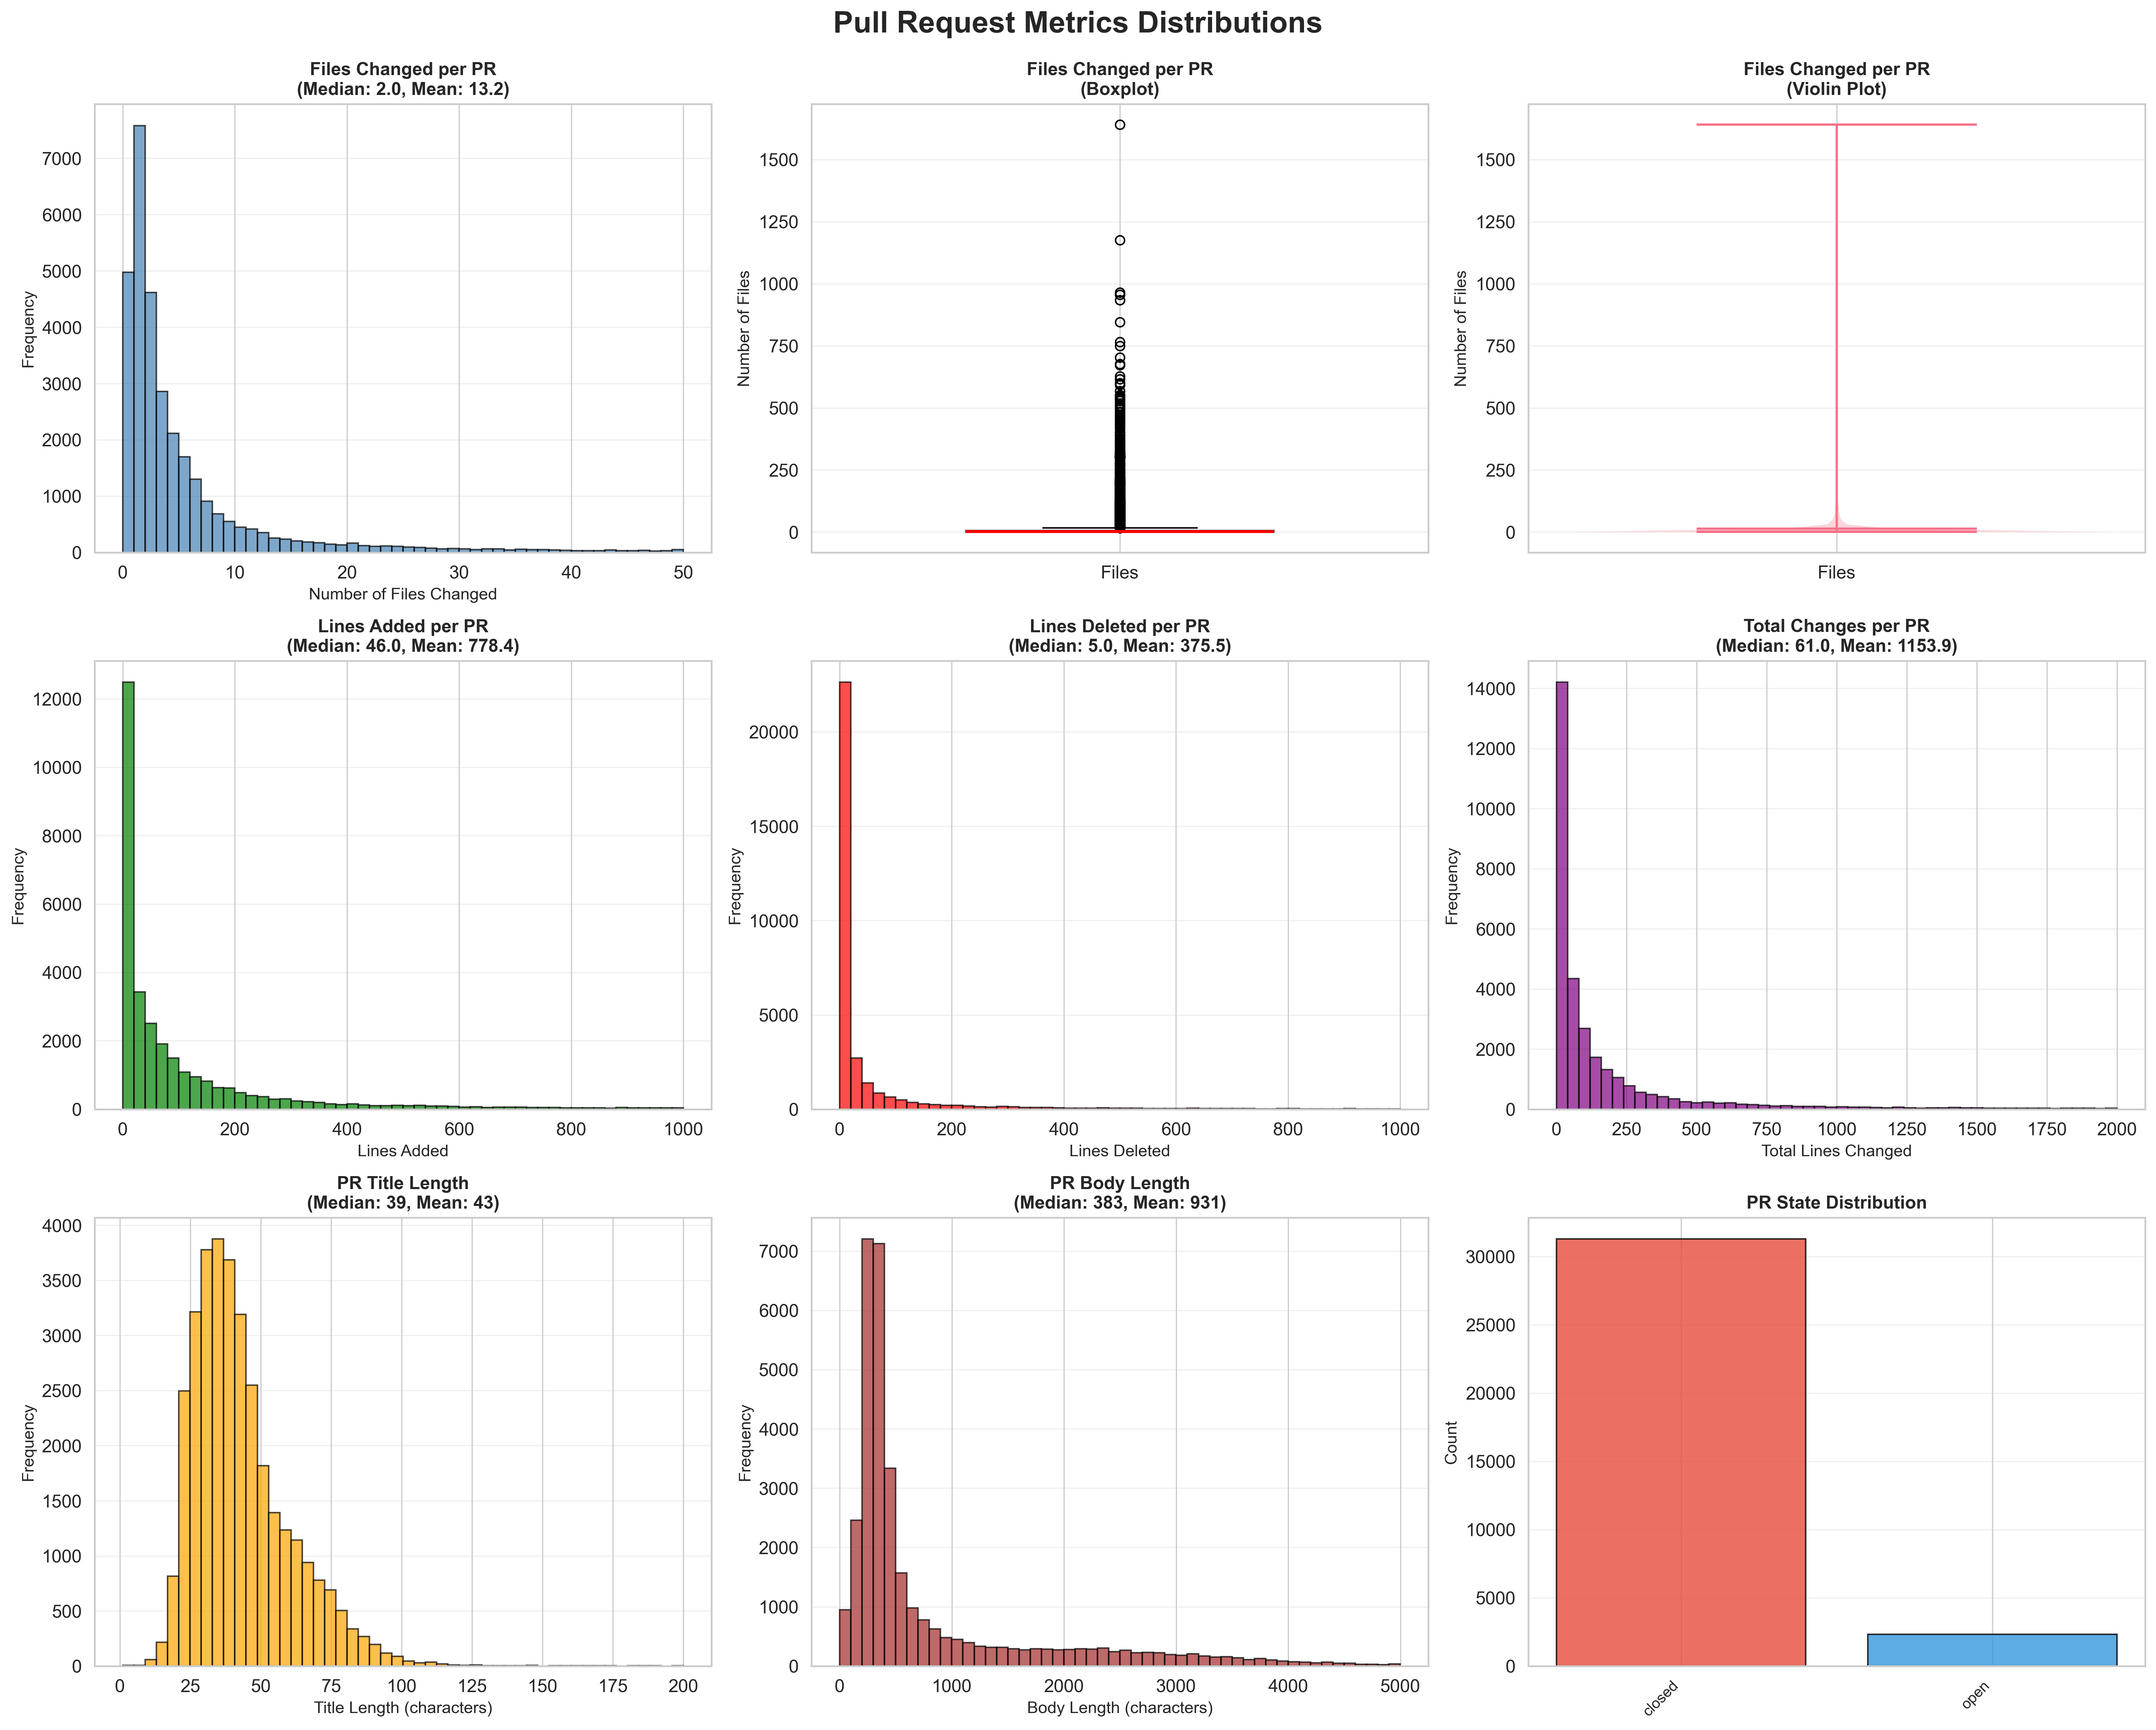

Figure saved: figures/pr_distributions.png


In [56]:
# Prepare data: Calculate files changed per PR from commit details
files_per_pr = pr_commit_details_df.groupby('pr_id')['filename'].nunique()
additions_per_pr = pr_commit_details_df.groupby('pr_id')['additions'].sum()
deletions_per_pr = pr_commit_details_df.groupby('pr_id')['deletions'].sum()

# Calculate total changes (use existing column or calculate)
if 'total_changes' in pr_commit_details_df.columns:
    changes_per_pr = pr_commit_details_df.groupby('pr_id')['total_changes'].sum()
else:
    changes_per_pr = additions_per_pr + deletions_per_pr

# Calculate text lengths
pr_df['title_length'] = pr_df['title'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
pr_df['body_length'] = pr_df['body'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Create figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Pull Request Metrics Distributions', fontsize=20, fontweight='bold', y=0.995)

# 1. Files changed per PR (Histogram)
ax = axes[0, 0]
data = files_per_pr[files_per_pr <= 50]  # Filter outliers for visibility
ax.hist(data, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Files Changed', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Files Changed per PR\n(Median: {files_per_pr.median():.1f}, Mean: {files_per_pr.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 2. Files changed per PR (Boxplot)
ax = axes[0, 1]
bp = ax.boxplot([files_per_pr], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('steelblue')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)
ax.set_ylabel('Number of Files', fontsize=11)
ax.set_title('Files Changed per PR\n(Boxplot)', fontsize=12)
ax.set_xticklabels(['Files'])
ax.grid(axis='y', alpha=0.3)

# 3. Files changed per PR (Violin plot)
ax = axes[0, 2]
parts = ax.violinplot([files_per_pr], vert=True, showmeans=True, showmedians=True)
ax.set_ylabel('Number of Files', fontsize=11)
ax.set_title('Files Changed per PR\n(Violin Plot)', fontsize=12)
ax.set_xticks([1])
ax.set_xticklabels(['Files'])
ax.grid(axis='y', alpha=0.3)

# 4. Lines added per PR (Histogram)
ax = axes[1, 0]
data = additions_per_pr[additions_per_pr <= 1000]  # Filter outliers
ax.hist(data, bins=50, color='green', edgecolor='black', alpha=0.7)
ax.set_xlabel('Lines Added', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Lines Added per PR\n(Median: {additions_per_pr.median():.1f}, Mean: {additions_per_pr.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 5. Lines deleted per PR (Histogram)
ax = axes[1, 1]
data = deletions_per_pr[deletions_per_pr <= 1000]  # Filter outliers
ax.hist(data, bins=50, color='red', edgecolor='black', alpha=0.7)
ax.set_xlabel('Lines Deleted', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Lines Deleted per PR\n(Median: {deletions_per_pr.median():.1f}, Mean: {deletions_per_pr.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 6. Total changes per PR (Histogram)
ax = axes[1, 2]
data = changes_per_pr[changes_per_pr <= 2000]  # Filter outliers
ax.hist(data, bins=50, color='purple', edgecolor='black', alpha=0.7)
ax.set_xlabel('Total Lines Changed', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Total Changes per PR\n(Median: {changes_per_pr.median():.1f}, Mean: {changes_per_pr.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 7. PR Title Length (Histogram)
ax = axes[2, 0]
data = pr_df['title_length'][pr_df['title_length'] <= 200]  # Filter outliers
ax.hist(data, bins=50, color='orange', edgecolor='black', alpha=0.7)
ax.set_xlabel('Title Length (characters)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'PR Title Length\n(Median: {pr_df["title_length"].median():.0f}, Mean: {pr_df["title_length"].mean():.0f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 8. PR Body Length (Histogram)
ax = axes[2, 1]
data = pr_df['body_length'][pr_df['body_length'] <= 5000]  # Filter outliers
ax.hist(data, bins=50, color='brown', edgecolor='black', alpha=0.7)
ax.set_xlabel('Body Length (characters)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'PR Body Length\n(Median: {pr_df["body_length"].median():.0f}, Mean: {pr_df["body_length"].mean():.0f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 9. PR State Distribution (Bar chart)
ax = axes[2, 2]
if 'state' in pr_df.columns:
    state_counts = pr_df['state'].value_counts()
    colors_state = ['#2ecc71' if 'merge' in str(s).lower() else '#e74c3c' if 'close' in str(s).lower() else '#3498db' 
                    for s in state_counts.index]
    ax.bar(range(len(state_counts)), state_counts.values, color=colors_state, edgecolor='black', alpha=0.8)
    ax.set_xticks(range(len(state_counts)))
    ax.set_xticklabels(state_counts.index, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_title('PR State Distribution', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/pr_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: figures/pr_distributions.png")


### 2.2 Commit, Review, and Timeline Distributions


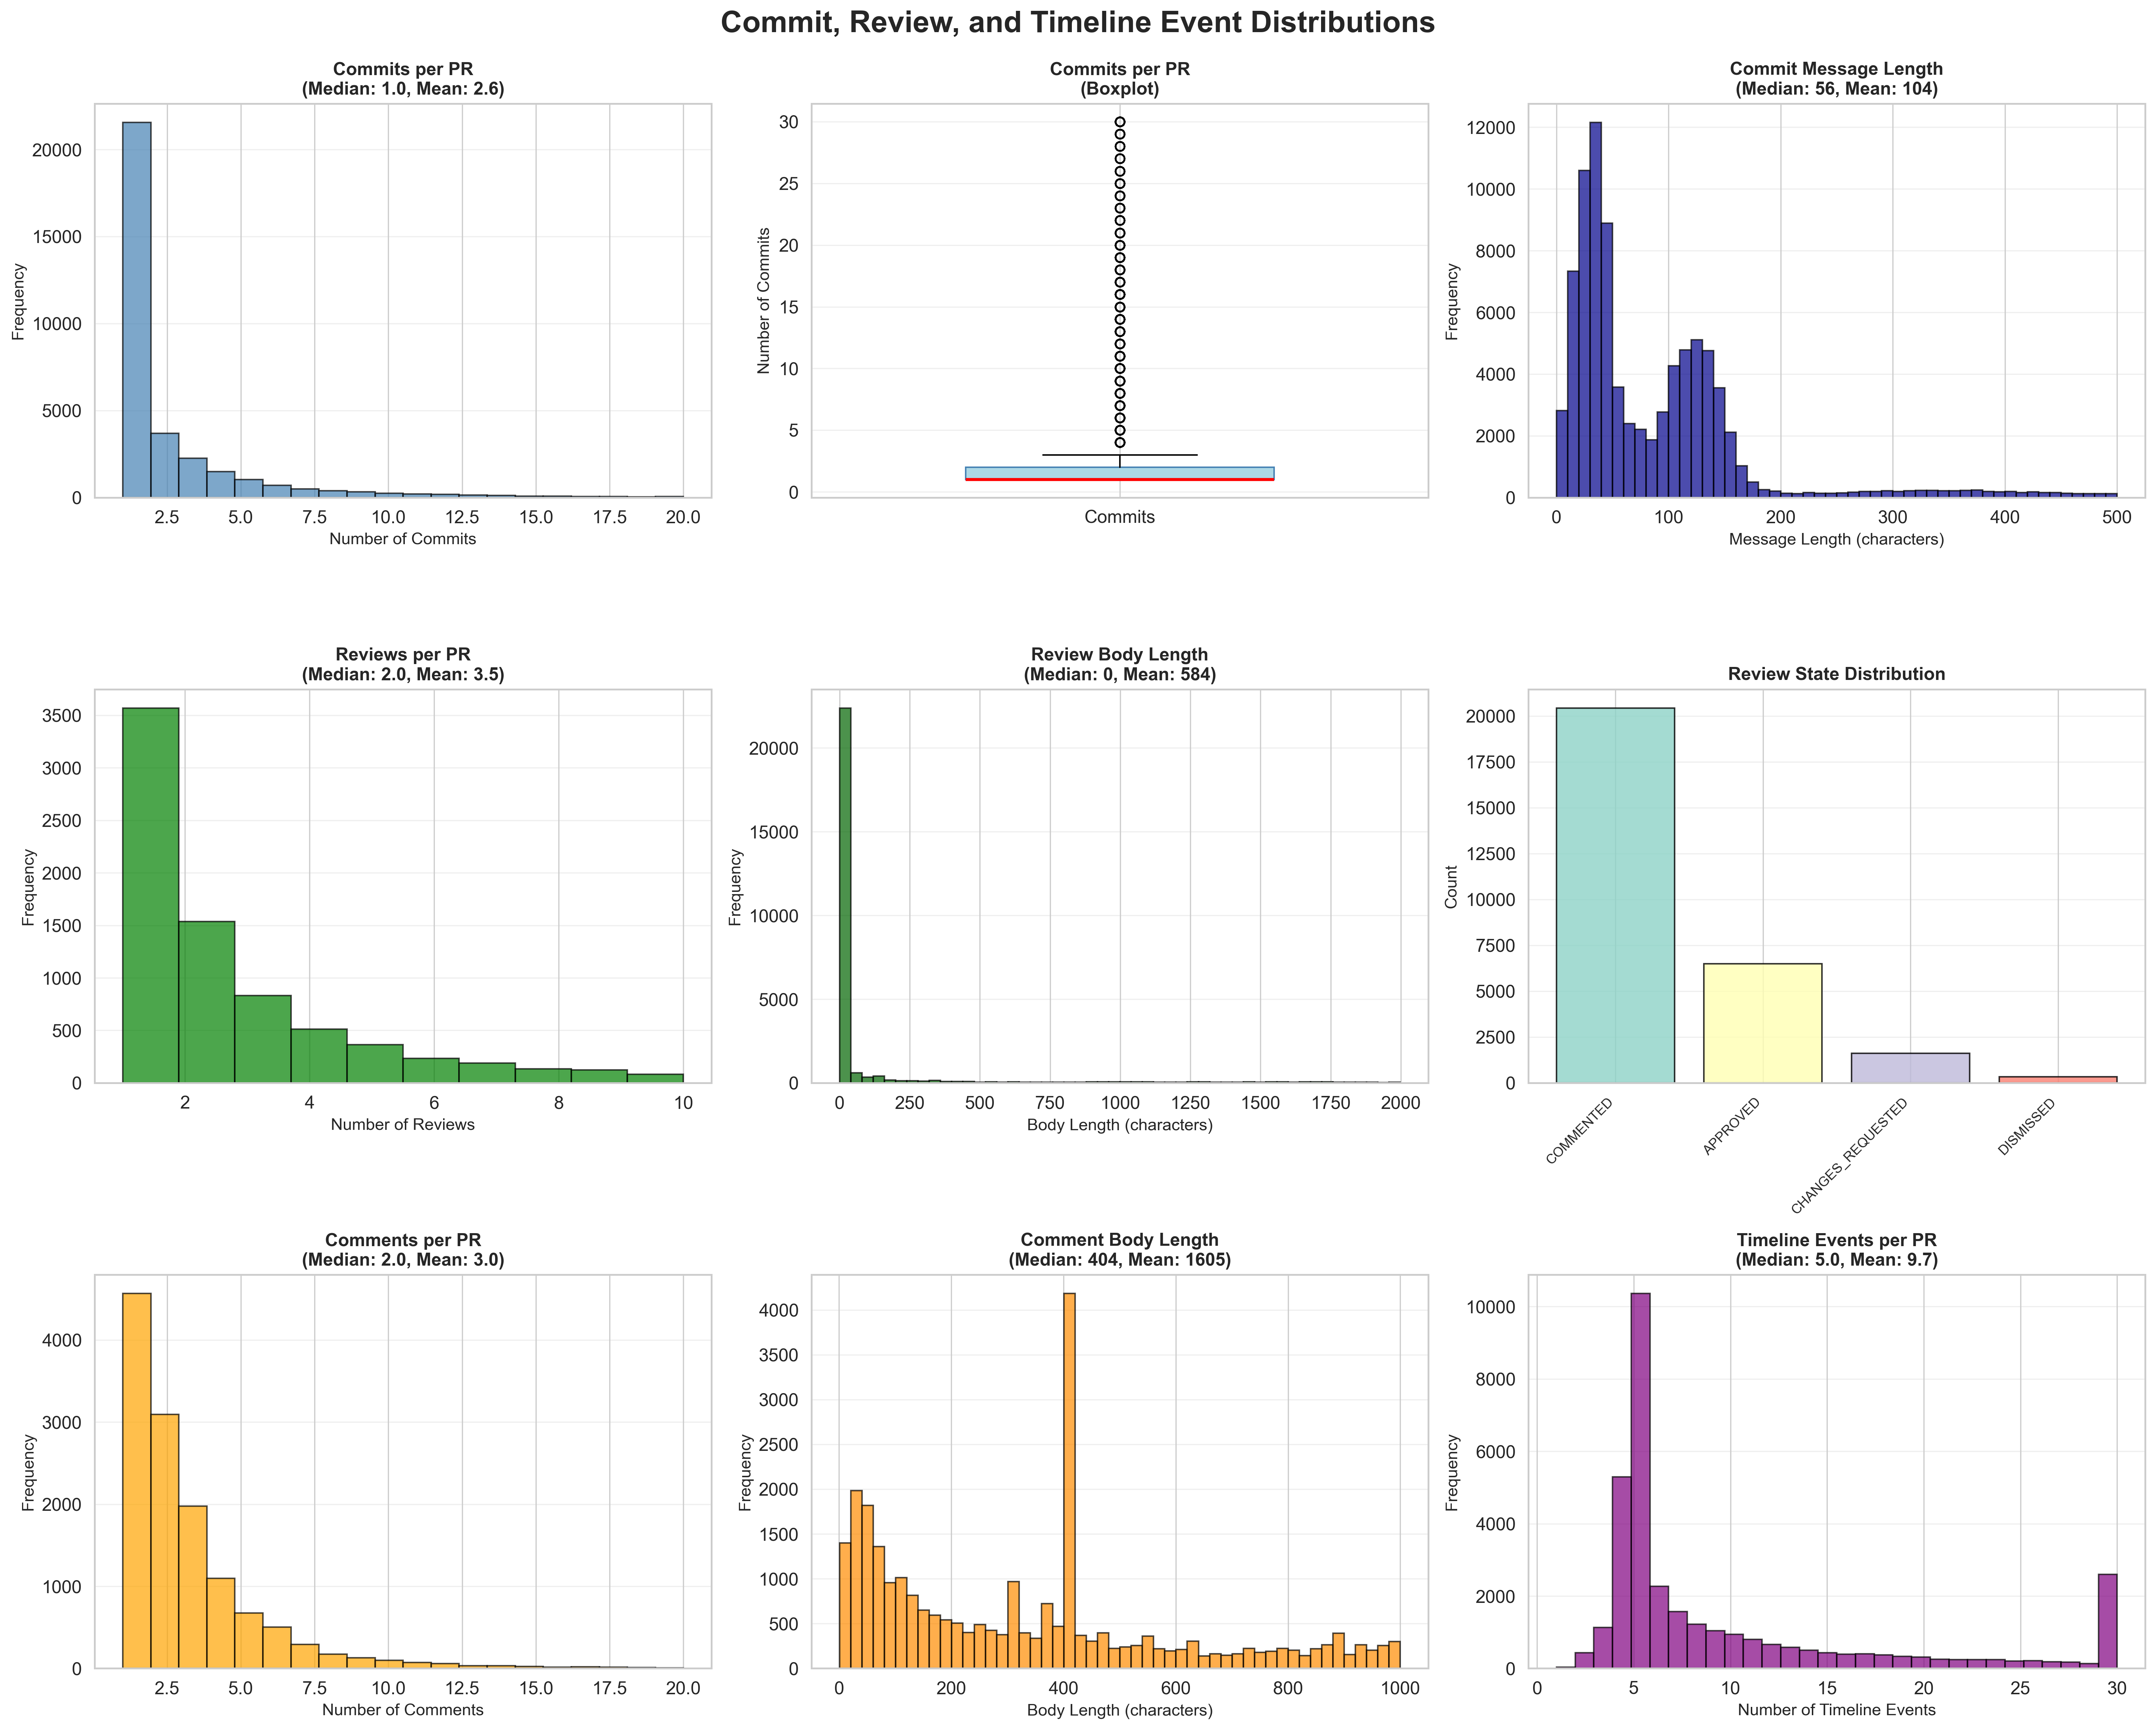

Figure saved: figures/commit_review_timeline_distributions.png


In [53]:
# Prepare data
commits_per_pr = pr_commits_df.groupby('pr_id').size()
reviews_per_pr = pr_reviews_df.groupby('pr_id').size()
comments_per_pr = pr_comments_df.groupby('pr_id').size()
timeline_events_per_pr = pr_timeline_df.groupby('pr_id').size()

pr_comments_df['body_length'] = pr_comments_df['body'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
pr_reviews_df['body_length'] = pr_reviews_df['body'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
pr_commits_df['message_length'] = pr_commits_df['message'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Create figure
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Commit, Review, and Timeline Event Distributions', fontsize=20, fontweight='bold', y=0.995)

# 1. Commits per PR (Histogram)
ax = axes[0, 0]
data = commits_per_pr[commits_per_pr <= 20]
ax.hist(data, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Commits', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Commits per PR\n(Median: {commits_per_pr.median():.1f}, Mean: {commits_per_pr.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 2. Commits per PR (Boxplot)
ax = axes[0, 1]
bp = ax.boxplot([commits_per_pr], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('steelblue')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)
ax.set_ylabel('Number of Commits', fontsize=11)
ax.set_title('Commits per PR\n(Boxplot)', fontsize=12)
ax.set_xticklabels(['Commits'])
ax.grid(axis='y', alpha=0.3)

# 3. Commit Message Length (Histogram)
ax = axes[0, 2]
data = pr_commits_df['message_length'][pr_commits_df['message_length'] <= 500]
ax.hist(data, bins=50, color='darkblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Message Length (characters)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Commit Message Length\n(Median: {pr_commits_df["message_length"].median():.0f}, Mean: {pr_commits_df["message_length"].mean():.0f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 4. Reviews per PR (Histogram)
ax = axes[1, 0]
data = reviews_per_pr[reviews_per_pr <= 10]
ax.hist(data, bins=10, color='green', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Reviews', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Reviews per PR\n(Median: {reviews_per_pr.median():.1f}, Mean: {reviews_per_pr.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 5. Review Body Length (Histogram)
ax = axes[1, 1]
data = pr_reviews_df['body_length'][pr_reviews_df['body_length'] <= 2000]
ax.hist(data, bins=50, color='darkgreen', edgecolor='black', alpha=0.7)
ax.set_xlabel('Body Length (characters)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Review Body Length\n(Median: {pr_reviews_df["body_length"].median():.0f}, Mean: {pr_reviews_df["body_length"].mean():.0f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 6. Review State Distribution
ax = axes[1, 2]
if 'state' in pr_reviews_df.columns:
    state_counts = pr_reviews_df['state'].value_counts().head(10)
    colors_review = plt.cm.Set3(range(len(state_counts)))
    ax.bar(range(len(state_counts)), state_counts.values, color=colors_review, edgecolor='black', alpha=0.8)
    ax.set_xticks(range(len(state_counts)))
    ax.set_xticklabels(state_counts.index, rotation=45, ha='right', fontsize=9)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_title('Review State Distribution', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 7. Comments per PR (Histogram)
ax = axes[2, 0]
data = comments_per_pr[comments_per_pr <= 20]
ax.hist(data, bins=20, color='orange', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Comments', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Comments per PR\n(Median: {comments_per_pr.median():.1f}, Mean: {comments_per_pr.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 8. Comment Body Length (Histogram)
ax = axes[2, 1]
data = pr_comments_df['body_length'][pr_comments_df['body_length'] <= 1000]
ax.hist(data, bins=50, color='darkorange', edgecolor='black', alpha=0.7)
ax.set_xlabel('Body Length (characters)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Comment Body Length\n(Median: {pr_comments_df["body_length"].median():.0f}, Mean: {pr_comments_df["body_length"].mean():.0f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 9. Timeline Events per PR (Histogram)
ax = axes[2, 2]
data = timeline_events_per_pr[timeline_events_per_pr <= 30]
ax.hist(data, bins=30, color='purple', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Timeline Events', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'Timeline Events per PR\n(Median: {timeline_events_per_pr.median():.1f}, Mean: {timeline_events_per_pr.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/commit_review_timeline_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: figures/commit_review_timeline_distributions.png")


### 2.3 User and Repository Distributions


In [57]:
# Calculate user and repository metrics
prs_per_user = pr_df.groupby('user').size()
prs_per_repo = pr_df.groupby('repo_url').size() if 'repo_url' in pr_df.columns else pr_df.groupby('repo_id').size()

# Create figure
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('User and Repository Distributions', fontsize=20, fontweight='bold', y=0.995)

# 1. PRs per User (Histogram)
ax = axes[0, 0]
data = prs_per_user[prs_per_user <= 50]
ax.hist(data, bins=50, color='teal', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of PRs', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'PRs per User\n(Median: {prs_per_user.median():.1f}, Mean: {prs_per_user.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 2. PRs per Repository (Histogram)
ax = axes[0, 1]
data = prs_per_repo[prs_per_repo <= 50]
ax.hist(data, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of PRs', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'PRs per Repository\n(Median: {prs_per_repo.median():.1f}, Mean: {prs_per_repo.mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 3. User Followers Distribution
ax = axes[0, 2]
if 'followers' in user_df.columns:
    data = user_df['followers'][user_df['followers'] <= 500]
    ax.hist(data, bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Number of Followers', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'User Followers\n(Median: {user_df["followers"].median():.0f}, Mean: {user_df["followers"].mean():.0f})', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
else:
    ax.text(0.5, 0.5, 'Followers data\nnot available', ha='center', va='center', fontsize=12)
    ax.set_title('User Followers Distribution', fontsize=12)

# 4. Repository Stars Distribution
ax = axes[1, 0]
if 'stars_count' in repo_df.columns:
    data = repo_df['stars_count'][repo_df['stars_count'] <= 10000]
    ax.hist(data, bins=50, color='gold', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Number of Stars', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'Repository Stars\n(Median: {repo_df["stars_count"].median():.0f}, Mean: {repo_df["stars_count"].mean():.0f})', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
else:
    ax.text(0.5, 0.5, 'Stars data\nnot available', ha='center', va='center', fontsize=12)
    ax.set_title('Repository Stars Distribution', fontsize=12)

# 5. Repository Forks Distribution
ax = axes[1, 1]
if 'forks_count' in repo_df.columns:
    data = repo_df['forks_count'][repo_df['forks_count'] <= 1000]
    ax.hist(data, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Number of Forks', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'Repository Forks\n(Median: {repo_df["forks_count"].median():.0f}, Mean: {repo_df["forks_count"].mean():.0f})', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
else:
    ax.text(0.5, 0.5, 'Forks data\nnot available', ha='center', va='center', fontsize=12)
    ax.set_title('Repository Forks Distribution', fontsize=12)

# 6. Programming Language Distribution (Top 10)
ax = axes[1, 2]
if 'language' in repo_df.columns:
    lang_counts = repo_df['language'].value_counts().head(10)
    colors_lang = plt.cm.tab10(range(len(lang_counts)))
    ax.barh(range(len(lang_counts)), lang_counts.values, color=colors_lang, edgecolor='black', alpha=0.8)
    ax.set_yticks(range(len(lang_counts)))
    ax.set_yticklabels(lang_counts.index, fontsize=9)
    ax.set_xlabel('Number of Repositories', fontsize=11)
    ax.set_title('Top 10 Programming Languages', fontsize=12)
    ax.grid(axis='x', alpha=0.3)
    ax.invert_yaxis()
else:
    ax.text(0.5, 0.5, 'Language data\nnot available', ha='center', va='center', fontsize=12)
    ax.set_title('Programming Language Distribution', fontsize=12)

plt.tight_layout()
plt.savefig('figures/user_repo_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: figures/user_repo_distributions.png")


Figure saved: figures/user_repo_distributions.png


### 2.4 File-Level Change Distributions


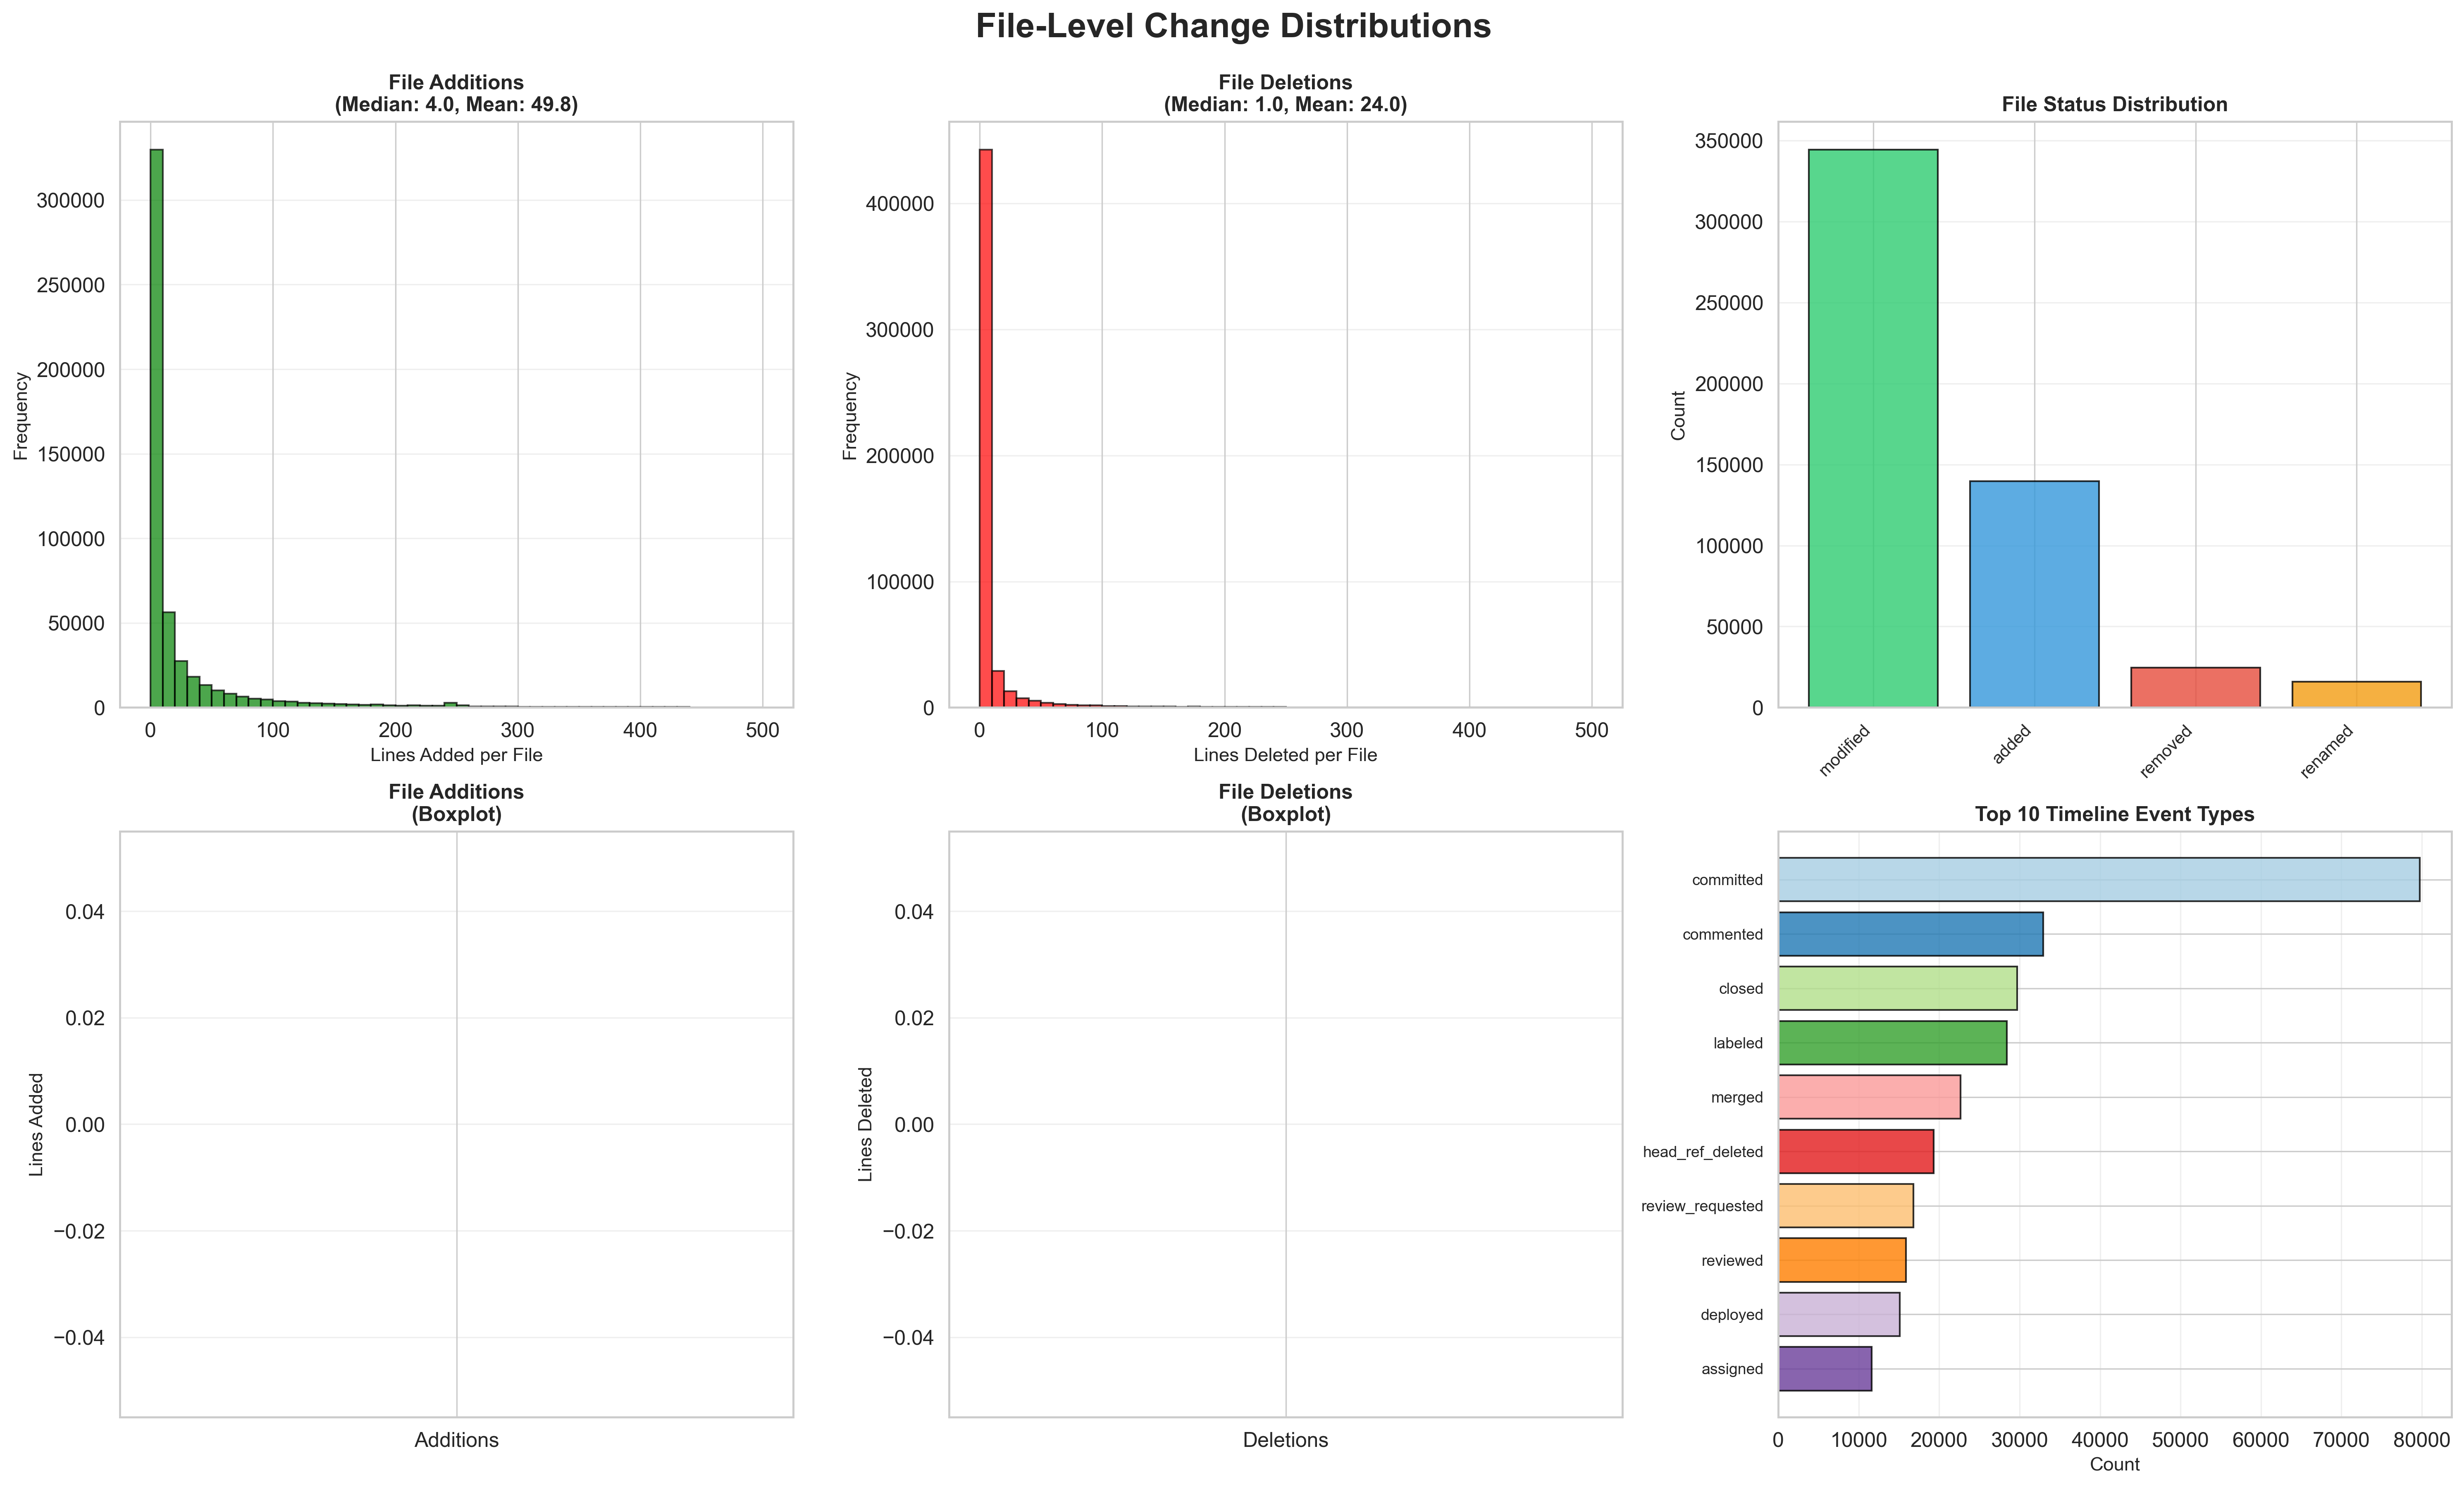

Figure saved: figures/file_level_distributions.png


In [58]:
# Create figure for file-level distributions
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('File-Level Change Distributions', fontsize=20, fontweight='bold', y=0.995)

# 1. File Additions Distribution (Histogram)
ax = axes[0, 0]
data = pr_commit_details_df['additions'][pr_commit_details_df['additions'] <= 500]
ax.hist(data, bins=50, color='green', edgecolor='black', alpha=0.7)
ax.set_xlabel('Lines Added per File', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'File Additions\n(Median: {pr_commit_details_df["additions"].median():.1f}, Mean: {pr_commit_details_df["additions"].mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 2. File Deletions Distribution (Histogram)
ax = axes[0, 1]
data = pr_commit_details_df['deletions'][pr_commit_details_df['deletions'] <= 500]
ax.hist(data, bins=50, color='red', edgecolor='black', alpha=0.7)
ax.set_xlabel('Lines Deleted per File', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f'File Deletions\n(Median: {pr_commit_details_df["deletions"].median():.1f}, Mean: {pr_commit_details_df["deletions"].mean():.1f})', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# 3. File Status Distribution
ax = axes[0, 2]
if 'status' in pr_commit_details_df.columns:
    status_counts = pr_commit_details_df['status'].value_counts().head(10)
    colors_status = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6']
    colors_status = colors_status[:len(status_counts)]
    ax.bar(range(len(status_counts)), status_counts.values, color=colors_status, edgecolor='black', alpha=0.8)
    ax.set_xticks(range(len(status_counts)))
    ax.set_xticklabels(status_counts.index, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_title('File Status Distribution', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
else:
    ax.text(0.5, 0.5, 'Status data\nnot available', ha='center', va='center', fontsize=12)
    ax.set_title('File Status Distribution', fontsize=12)

# 4. File Additions Boxplot
ax = axes[1, 0]
bp = ax.boxplot([pr_commit_details_df['additions']], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightgreen')
bp['boxes'][0].set_edgecolor('green')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)
ax.set_ylabel('Lines Added', fontsize=11)
ax.set_title('File Additions\n(Boxplot)', fontsize=12)
ax.set_xticklabels(['Additions'])
ax.grid(axis='y', alpha=0.3)

# 5. File Deletions Boxplot
ax = axes[1, 1]
bp = ax.boxplot([pr_commit_details_df['deletions']], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightcoral')
bp['boxes'][0].set_edgecolor('red')
bp['medians'][0].set_color('blue')
bp['medians'][0].set_linewidth(2)
ax.set_ylabel('Lines Deleted', fontsize=11)
ax.set_title('File Deletions\n(Boxplot)', fontsize=12)
ax.set_xticklabels(['Deletions'])
ax.grid(axis='y', alpha=0.3)

# 6. Timeline Event Types Distribution
ax = axes[1, 2]
if 'event' in pr_timeline_df.columns:
    event_counts = pr_timeline_df['event'].value_counts().head(10)
    colors_event = plt.cm.Paired(range(len(event_counts)))
    ax.barh(range(len(event_counts)), event_counts.values, color=colors_event, edgecolor='black', alpha=0.8)
    ax.set_yticks(range(len(event_counts)))
    ax.set_yticklabels(event_counts.index, fontsize=9)
    ax.set_xlabel('Count', fontsize=11)
    ax.set_title('Top 10 Timeline Event Types', fontsize=12)
    ax.grid(axis='x', alpha=0.3)
    ax.invert_yaxis()
else:
    ax.text(0.5, 0.5, 'Event data\nnot available', ha='center', va='center', fontsize=12)
    ax.set_title('Timeline Event Types', fontsize=12)

plt.tight_layout()
plt.savefig('figures/file_level_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: figures/file_level_distributions.png")


### 2.5 Summary Visualization - Dataset Overview


In [59]:
# Create comprehensive summary visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

fig.suptitle('AIDev Dataset - Comprehensive Size Metrics Overview', fontsize=22, fontweight='bold', y=0.98)

# 1. Entity Counts (Bar chart)
ax1 = fig.add_subplot(gs[0, :])
entity_data = {
    'Pull Requests': len(pr_df),
    'Repositories': len(repo_df),
    'Users': len(user_df),
    'Issues': len(issue_df),
    'PR Comments': len(pr_comments_df),
    'PR Reviews': len(pr_reviews_df),
    'PR Commits': len(pr_commits_df),
    'File Changes': len(pr_commit_details_df),
    'Timeline Events': len(pr_timeline_df)
}
colors_entities = plt.cm.Set3(range(len(entity_data)))
bars = ax1.bar(entity_data.keys(), entity_data.values(), color=colors_entities, edgecolor='black', alpha=0.8)
ax1.set_ylabel('Count (log scale)', fontsize=12, fontweight='bold')
ax1.set_title('Dataset Entity Counts', fontsize=14, fontweight='bold')
ax1.set_yscale('log')
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=45, labelsize=10)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Lines of Code Metrics
ax2 = fig.add_subplot(gs[1, 0])
loc_data = {
    'Lines Added': total_additions,
    'Lines Deleted': total_deletions,
    'Net Lines': total_additions - total_deletions
}
colors_loc = ['#2ecc71', '#e74c3c', '#3498db']
bars = ax2.bar(loc_data.keys(), loc_data.values(), color=colors_loc, edgecolor='black', alpha=0.8)
ax2.set_ylabel('Lines of Code', fontsize=11, fontweight='bold')
ax2.set_title('Lines of Code Statistics', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=15, labelsize=10)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height/1000):,}K',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. People Metrics
ax3 = fig.add_subplot(gs[1, 1])
people_data = {
    'Total Users': len(user_df),
    'PR Authors': len(pr_authors),
    'Reviewers': len(reviewers),
    'Commenters': len(commenters),
    'Commit Authors': len(commit_authors)
}
colors_people = plt.cm.Pastel1(range(len(people_data)))
bars = ax3.bar(people_data.keys(), people_data.values(), color=colors_people, edgecolor='black', alpha=0.8)
ax3.set_ylabel('Count', fontsize=11, fontweight='bold')
ax3.set_title('People/Author Metrics', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
ax3.tick_params(axis='x', rotation=45, labelsize=9)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=9)

# 4. Files and Vocabulary
ax4 = fig.add_subplot(gs[1, 2])
file_vocab_data = {
    'Unique Files': unique_files,
    'File Changes': len(pr_commit_details_df),
    'Vocab Tokens\n(thousands)': len(all_vocab) // 1000
}
colors_fv = ['#f39c12', '#e67e22', '#9b59b6']
bars = ax4.bar(file_vocab_data.keys(), file_vocab_data.values(), color=colors_fv, edgecolor='black', alpha=0.8)
ax4.set_ylabel('Count', fontsize=11, fontweight='bold')
ax4.set_title('Files & Vocabulary Metrics', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
ax4.tick_params(axis='x', labelsize=9)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=9)

# 5. Key Statistics Summary (Text box)
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('off')

summary_text = f"""
KEY DATASET STATISTICS

ENTITIES:  Pull Requests: {len(pr_df):,}  |  Repositories: {len(repo_df):,}  |  Users: {len(user_df):,}  |  Issues: {len(issue_df):,}
           Comments: {len(pr_comments_df):,}  |  Reviews: {len(pr_reviews_df):,}  |  Commits: {len(pr_commits_df):,}  |  Timeline Events: {len(pr_timeline_df):,}

CODE:      Unique Files: {unique_files:,}  |  File-Level Changes: {len(pr_commit_details_df):,}
           Total Lines Added: {total_additions:,}  |  Total Lines Deleted: {total_deletions:,}  |  Net Lines: {total_additions - total_deletions:,}

PEOPLE:    Total Users: {len(user_df):,}  |  PR Authors: {len(pr_authors):,}  |  Reviewers: {len(reviewers):,}  |  All Unique People: {len(all_people):,}

TEXT:      Unique Vocabulary Tokens: {len(all_vocab):,}
           PR Titles: {len(pr_title_vocab):,} tokens  |  Commit Messages: {len(commit_message_vocab):,} tokens  |  Comments: {len(comment_vocab):,} tokens

ACTIVITY:  Avg Commits per PR: {commits_per_pr.mean():.2f}  |  Avg Reviews per PR: {reviews_per_pr.mean():.2f}  |  Avg Comments per PR: {comments_per_pr.mean():.2f}
           Avg Files Changed per PR: {files_per_pr.mean():.2f}  |  Avg Timeline Events per PR: {timeline_events_per_pr.mean():.2f}
"""

ax5.text(0.5, 0.5, summary_text, 
        ha='center', va='center', 
        fontsize=11, 
        family='monospace',
        bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', edgecolor='black', linewidth=2, alpha=0.8))

plt.savefig('figures/dataset_summary_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("VISUALIZATION COMPLETE!")
print("="*80)
print("Generated figures:")
print("  1. figures/pr_distributions.png")
print("  2. figures/commit_review_timeline_distributions.png")
print("  3. figures/user_repo_distributions.png")
print("  4. figures/file_level_distributions.png")
print("  5. figures/dataset_summary_overview.png")
print("="*80)



VISUALIZATION COMPLETE!
Generated figures:
  1. figures/pr_distributions.png
  2. figures/commit_review_timeline_distributions.png
  3. figures/user_repo_distributions.png
  4. figures/file_level_distributions.png
  5. figures/dataset_summary_overview.png


## 3. Conclusion

This analysis has provided comprehensive insights into the AIDev dataset covering:

### Size Metrics (Section 1.5.2)
✅ **Entity Counts**: Detailed counts of all entities including PRs, repositories, users, issues, comments, reviews, commits, and timeline events

✅ **Project Metrics**: Repository-level statistics including programming languages, stars, and forks

✅ **Commit & Patch Metrics**: Comprehensive analysis of code changes, additions, deletions, and file-level modifications

✅ **Author Metrics**: Detailed breakdown of all people participating in the dataset across different roles (PR authors, reviewers, commenters, commit authors)

✅ **File/Blob Metrics**: Analysis of unique files modified, file sizes, and line count statistics

✅ **Vocabulary Metrics**: Unique token counts extracted from all text fields in the dataset

✅ **Summary Statistics**: Comprehensive statistical summaries for each entity type including means, medians, distributions, and counts

### Distribution Visualizations (Section 1.5.3)
✅ **Pull Request Distributions**: Histograms, boxplots, and violin plots showing files changed, lines added/deleted, title/body lengths, and PR states

✅ **Commit, Review & Timeline Distributions**: Multiple visualizations showing commits per PR, review patterns, comment frequencies, and timeline event distributions

✅ **User & Repository Distributions**: Analysis of PRs per user, PRs per repository, user followers, repository stars/forks, and programming language distributions

✅ **File-Level Distributions**: Detailed distributions of file additions, deletions, file status, and timeline event types

✅ **Summary Overview**: Comprehensive visualization summarizing all key metrics in a single figure

### Key Findings
The dataset is substantial and comprehensive:
- Contains tens of thousands of pull requests, commits, and interactions
- Covers thousands of repositories and users
- Includes millions of lines of code changes
- Has rich text content with extensive vocabulary
- Captures detailed temporal and collaborative patterns

All visualizations have been saved to the `figures/` directory for inclusion in your graduate assignment.


## 4. Temporal Analysis - Entities Over Time

This section explores how different entities in the dataset evolved over time, answering key research questions about dataset growth, activity patterns, and temporal trends.


In [61]:
# Prepare temporal data
# Convert date columns to datetime
pr_df['created_at'] = pd.to_datetime(pr_df['created_at'])
pr_df['closed_at'] = pd.to_datetime(pr_df['closed_at'])
if 'merged_at' in pr_df.columns:
    pr_df['merged_at'] = pd.to_datetime(pr_df['merged_at'])

pr_comments_df['created_at'] = pd.to_datetime(pr_comments_df['created_at'])
pr_reviews_df['submitted_at'] = pd.to_datetime(pr_reviews_df['submitted_at'])
pr_timeline_df['created_at'] = pd.to_datetime(pr_timeline_df['created_at'])
issue_df['created_at'] = pd.to_datetime(issue_df['created_at'])

print("Temporal data prepared successfully!")
print(f"Date range in PR data: {pr_df['created_at'].min()} to {pr_df['created_at'].max()}")
print(f"Total days covered: {(pr_df['created_at'].max() - pr_df['created_at'].min()).days} days")


Temporal data prepared successfully!
Date range in PR data: 2024-12-24 00:23:09+00:00 to 2025-07-30 19:36:13+00:00
Total days covered: 218 days


### Research Question 1: How has Pull Request activity evolved over time?
**Hypothesis**: PR creation shows growth patterns indicating increasing adoption of AI coding agents


In [62]:
# Calculate daily and cumulative PR counts
pr_daily = pr_df.groupby(pr_df['created_at'].dt.date).size()
pr_cumulative = pr_daily.cumsum()

# Create figure
fig, axes = plt.subplots(2, 1, figsize=(18, 12))
fig.suptitle('RQ1: Pull Request Activity Over Time', fontsize=18, fontweight='bold')

# 1. Daily PR Creation
ax = axes[0]
ax.plot(pr_daily.index, pr_daily.values, color='steelblue', linewidth=1.5, alpha=0.7, label='Daily PRs')
# Add 7-day rolling average
rolling_avg = pr_daily.rolling(window=7, center=True).mean()
ax.plot(rolling_avg.index, rolling_avg.values, color='red', linewidth=2.5, label='7-day Moving Average')
ax.fill_between(pr_daily.index, pr_daily.values, alpha=0.3, color='steelblue')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of PRs Created', fontsize=12, fontweight='bold')
ax.set_title('Daily Pull Request Creation Rate', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=11)

# Add statistics
total_prs = len(pr_df)
avg_daily = pr_daily.mean()
max_daily = pr_daily.max()
ax.text(0.98, 0.95, f'Total PRs: {total_prs:,}\nAvg Daily: {avg_daily:.1f}\nMax Daily: {max_daily:.0f}',
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 2. Cumulative PR Growth
ax = axes[1]
ax.plot(pr_cumulative.index, pr_cumulative.values, color='darkgreen', linewidth=2.5)
ax.fill_between(pr_cumulative.index, pr_cumulative.values, alpha=0.3, color='green')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Cumulative Number of PRs', fontsize=12, fontweight='bold')
ax.set_title('Cumulative Pull Request Growth', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add milestone markers
milestones = [pr_cumulative.max() * 0.25, pr_cumulative.max() * 0.5, pr_cumulative.max() * 0.75]
for milestone in milestones:
    idx = (pr_cumulative - milestone).abs().idxmin()
    ax.axhline(y=milestone, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax.text(pr_cumulative.index[0], milestone, f'{int(milestone):,}', 
            fontsize=9, verticalalignment='bottom', color='red')

plt.tight_layout()
plt.savefig('figures/temporal_01_pr_growth.png', dpi=300, bbox_inches='tight')
plt.show()

print("="*80)
print("RESEARCH QUESTION 1 FINDINGS:")
print("="*80)
print(f"Total PRs created: {total_prs:,}")
print(f"Average daily PR rate: {avg_daily:.2f} PRs/day")
print(f"Peak daily activity: {max_daily:.0f} PRs on {pr_daily.idxmax()}")
print(f"Dataset collection period: {(pr_df['created_at'].max() - pr_df['created_at'].min()).days} days")
print("="*80)


RESEARCH QUESTION 1 FINDINGS:
Total PRs created: 33,596
Average daily PR rate: 153.41 PRs/day
Peak daily activity: 683 PRs on 2025-06-18
Dataset collection period: 218 days


### Research Question 2: How do different entity types evolve together over time?
**Hypothesis**: Comments, reviews, and issues follow similar temporal patterns to PRs, indicating correlated community engagement


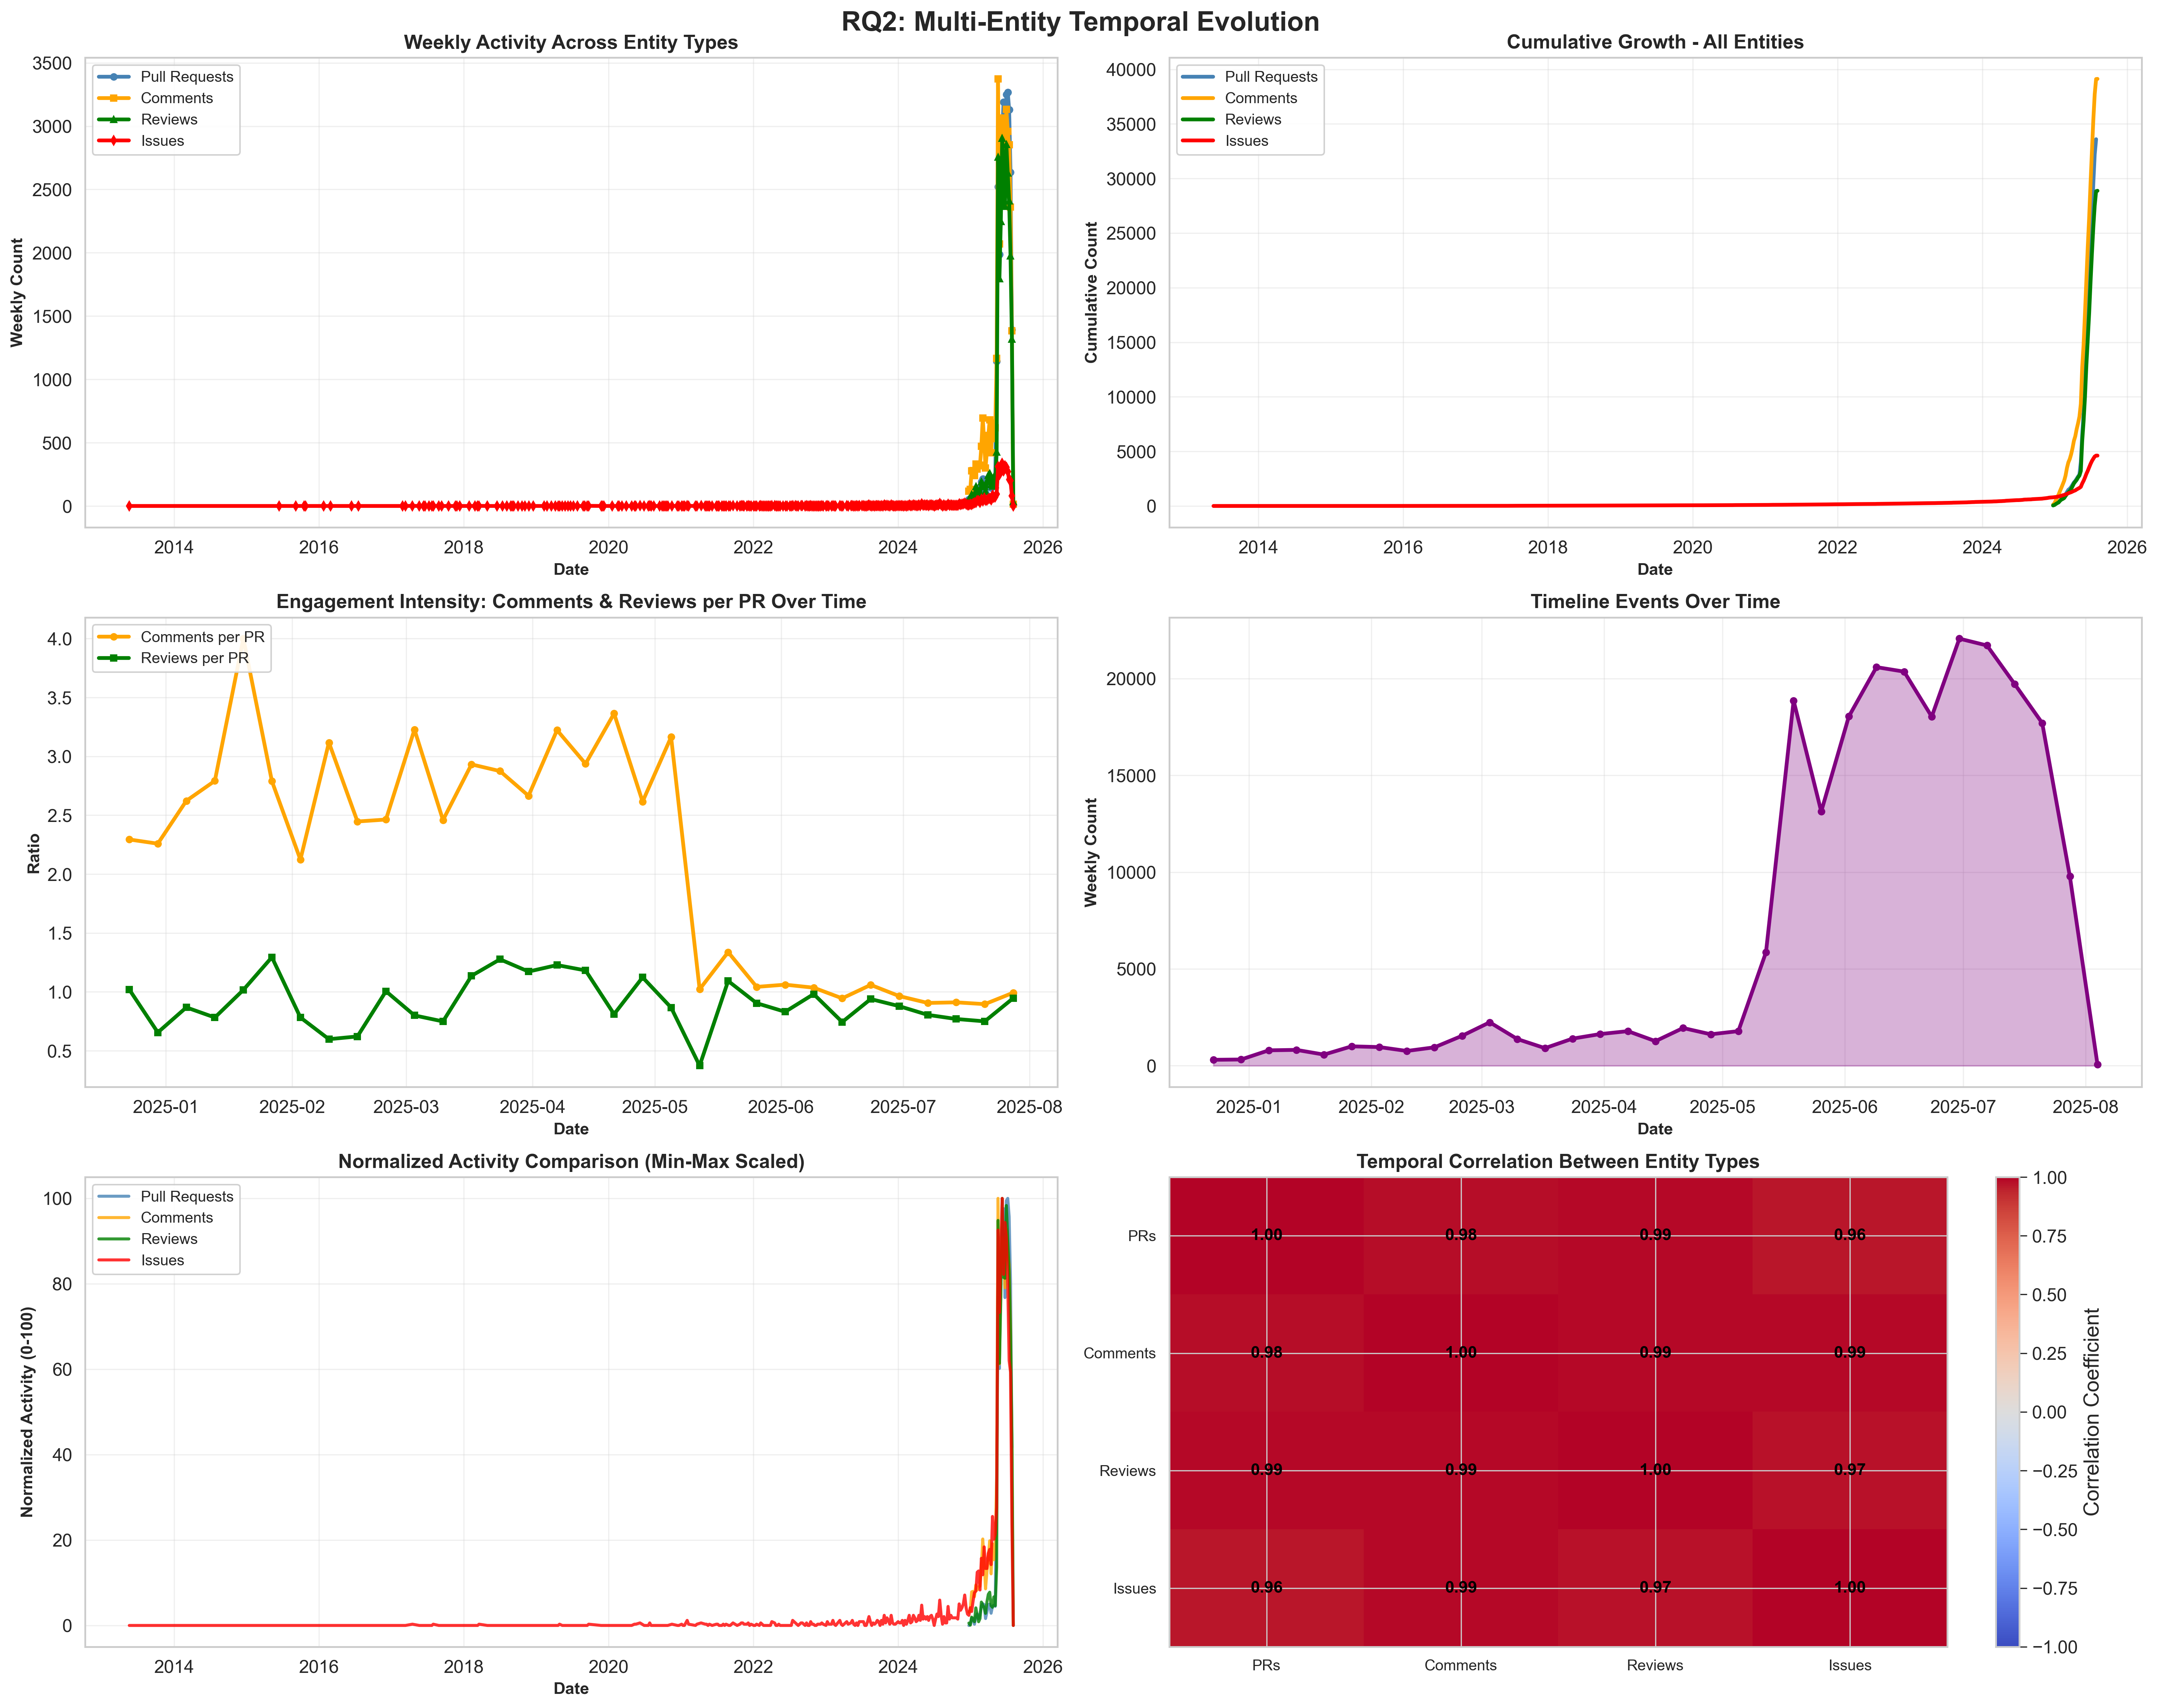

RESEARCH QUESTION 2 FINDINGS:
Average weekly PRs: 1049.88
Average weekly Comments: 1185.52
Average weekly Reviews: 875.00
Average weekly Issues: 16.13

Average Comments per PR: 2.14
Average Reviews per PR: 0.91

Temporal Correlations:
               PRs  Comments   Reviews    Issues
PRs       1.000000  0.983899  0.989806  0.962799
Comments  0.983899  1.000000  0.986909  0.985180
Reviews   0.989806  0.986909  1.000000  0.974908
Issues    0.962799  0.985180  0.974908  1.000000


In [63]:
# Calculate weekly counts for multiple entities
pr_weekly = pr_df.groupby(pr_df['created_at'].dt.to_period('W')).size()
comments_weekly = pr_comments_df.groupby(pr_comments_df['created_at'].dt.to_period('W')).size()
reviews_weekly = pr_reviews_df.groupby(pr_reviews_df['submitted_at'].dt.to_period('W')).size()
issues_weekly = issue_df.groupby(issue_df['created_at'].dt.to_period('W')).size()
timeline_weekly = pr_timeline_df.groupby(pr_timeline_df['created_at'].dt.to_period('W')).size()

# Convert periods to timestamps for plotting
pr_weekly.index = pr_weekly.index.to_timestamp()
comments_weekly.index = comments_weekly.index.to_timestamp()
reviews_weekly.index = reviews_weekly.index.to_timestamp()
issues_weekly.index = issues_weekly.index.to_timestamp()
timeline_weekly.index = timeline_weekly.index.to_timestamp()

# Create figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 16))
fig.suptitle('RQ2: Multi-Entity Temporal Evolution', fontsize=18, fontweight='bold')

# 1. Weekly counts - all entities
ax = axes[0, 0]
ax.plot(pr_weekly.index, pr_weekly.values, label='Pull Requests', linewidth=2.5, marker='o', markersize=4, color='steelblue')
ax.plot(comments_weekly.index, comments_weekly.values, label='Comments', linewidth=2.5, marker='s', markersize=4, color='orange')
ax.plot(reviews_weekly.index, reviews_weekly.values, label='Reviews', linewidth=2.5, marker='^', markersize=4, color='green')
ax.plot(issues_weekly.index, issues_weekly.values, label='Issues', linewidth=2.5, marker='d', markersize=4, color='red')
ax.set_xlabel('Date', fontsize=11, fontweight='bold')
ax.set_ylabel('Weekly Count', fontsize=11, fontweight='bold')
ax.set_title('Weekly Activity Across Entity Types', fontsize=13, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

# 2. Cumulative growth comparison
ax = axes[0, 1]
ax.plot(pr_weekly.index, pr_weekly.cumsum().values, label='Pull Requests', linewidth=2.5, color='steelblue')
ax.plot(comments_weekly.index, comments_weekly.cumsum().values, label='Comments', linewidth=2.5, color='orange')
ax.plot(reviews_weekly.index, reviews_weekly.cumsum().values, label='Reviews', linewidth=2.5, color='green')
ax.plot(issues_weekly.index, issues_weekly.cumsum().values, label='Issues', linewidth=2.5, color='red')
ax.set_xlabel('Date', fontsize=11, fontweight='bold')
ax.set_ylabel('Cumulative Count', fontsize=11, fontweight='bold')
ax.set_title('Cumulative Growth - All Entities', fontsize=13, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

# 3. PRs with Comments/Reviews ratio over time
ax = axes[1, 0]
# Align indices
common_index = pr_weekly.index.intersection(comments_weekly.index).intersection(reviews_weekly.index)
comments_per_pr = comments_weekly[common_index] / pr_weekly[common_index]
reviews_per_pr = reviews_weekly[common_index] / pr_weekly[common_index]

ax.plot(common_index, comments_per_pr.values, label='Comments per PR', linewidth=2.5, color='orange', marker='o', markersize=4)
ax.plot(common_index, reviews_per_pr.values, label='Reviews per PR', linewidth=2.5, color='green', marker='s', markersize=4)
ax.set_xlabel('Date', fontsize=11, fontweight='bold')
ax.set_ylabel('Ratio', fontsize=11, fontweight='bold')
ax.set_title('Engagement Intensity: Comments & Reviews per PR Over Time', fontsize=13, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

# 4. Timeline events over time
ax = axes[1, 1]
ax.plot(timeline_weekly.index, timeline_weekly.values, linewidth=2.5, color='purple', marker='o', markersize=4)
ax.fill_between(timeline_weekly.index, timeline_weekly.values, alpha=0.3, color='purple')
ax.set_xlabel('Date', fontsize=11, fontweight='bold')
ax.set_ylabel('Weekly Count', fontsize=11, fontweight='bold')
ax.set_title('Timeline Events Over Time', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

# 5. Normalized comparison (scaled to 0-100)
ax = axes[2, 0]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))

pr_normalized = scaler.fit_transform(pr_weekly.values.reshape(-1, 1)).flatten()
comments_normalized = scaler.fit_transform(comments_weekly.values.reshape(-1, 1)).flatten()
reviews_normalized = scaler.fit_transform(reviews_weekly.values.reshape(-1, 1)).flatten()
issues_normalized = scaler.fit_transform(issues_weekly.values.reshape(-1, 1)).flatten()

ax.plot(pr_weekly.index, pr_normalized, label='Pull Requests', linewidth=2, alpha=0.8, color='steelblue')
ax.plot(comments_weekly.index, comments_normalized, label='Comments', linewidth=2, alpha=0.8, color='orange')
ax.plot(reviews_weekly.index, reviews_normalized, label='Reviews', linewidth=2, alpha=0.8, color='green')
ax.plot(issues_weekly.index, issues_normalized, label='Issues', linewidth=2, alpha=0.8, color='red')
ax.set_xlabel('Date', fontsize=11, fontweight='bold')
ax.set_ylabel('Normalized Activity (0-100)', fontsize=11, fontweight='bold')
ax.set_title('Normalized Activity Comparison (Min-Max Scaled)', fontsize=13, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

# 6. Correlation heatmap over time (rolling correlation)
ax = axes[2, 1]
# Create dataframe with aligned data
df_temporal = pd.DataFrame({
    'PRs': pr_weekly,
    'Comments': comments_weekly,
    'Reviews': reviews_weekly,
    'Issues': issues_weekly
})
df_temporal = df_temporal.fillna(0)

# Calculate correlation
corr_matrix = df_temporal.corr()
im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontsize=10)
ax.set_yticklabels(corr_matrix.columns, fontsize=10)
ax.set_title('Temporal Correlation Between Entity Types', fontsize=13, fontweight='bold')

# Add correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=11, fontweight='bold')

plt.colorbar(im, ax=ax, label='Correlation Coefficient')

plt.tight_layout()
plt.savefig('figures/temporal_02_multi_entity_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

print("="*80)
print("RESEARCH QUESTION 2 FINDINGS:")
print("="*80)
print(f"Average weekly PRs: {pr_weekly.mean():.2f}")
print(f"Average weekly Comments: {comments_weekly.mean():.2f}")
print(f"Average weekly Reviews: {reviews_weekly.mean():.2f}")
print(f"Average weekly Issues: {issues_weekly.mean():.2f}")
print(f"\nAverage Comments per PR: {comments_per_pr.mean():.2f}")
print(f"Average Reviews per PR: {reviews_per_pr.mean():.2f}")
print("\nTemporal Correlations:")
print(corr_matrix)
print("="*80)


### Research Question 3: How do repository and user participation evolve over time?
**Hypothesis**: The dataset shows expansion in both repository diversity and user base, indicating growing ecosystem adoption


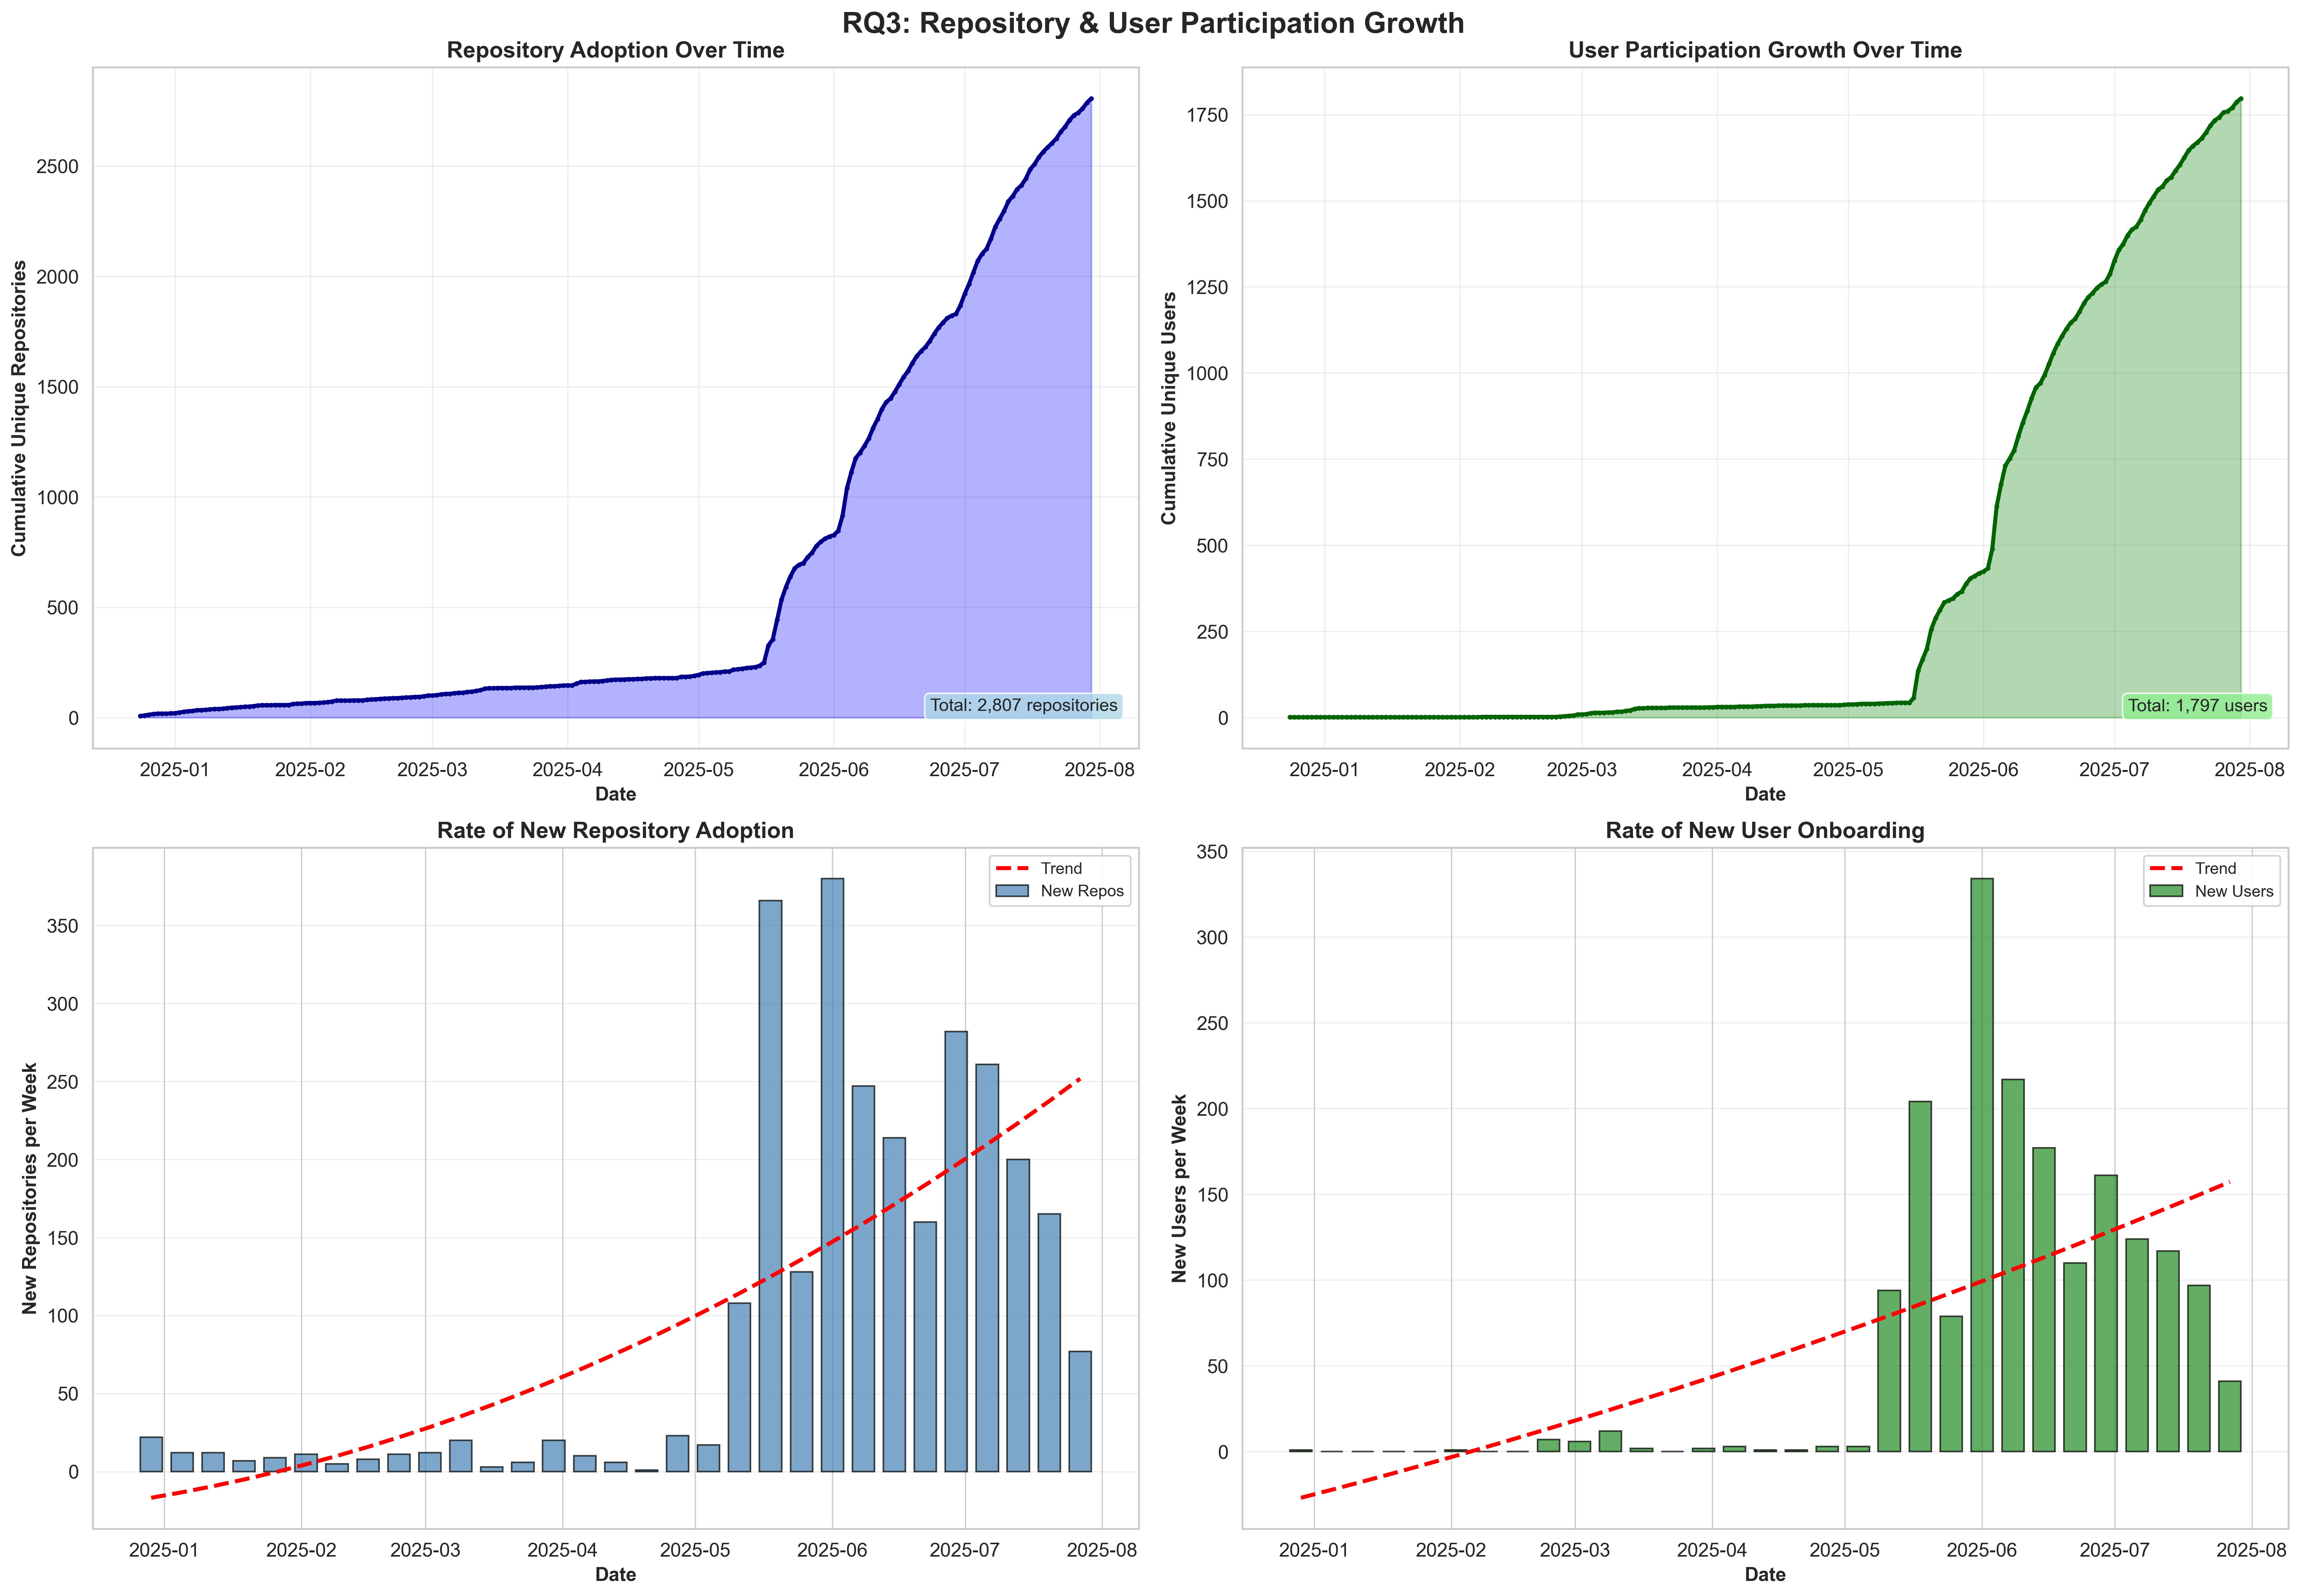

RESEARCH QUESTION 3 FINDINGS:
Total unique repositories: 2,807
Total unique users: 1,797
Average new repos per week: 90.42
Average new users per week: 57.97
Peak new repos in one week: 380
Peak new users in one week: 334


In [64]:
# Calculate unique repositories and users over time
pr_df_sorted = pr_df.sort_values('created_at')

# Track cumulative unique repos and users
unique_repos_over_time = []
unique_users_over_time = []
dates = []

repo_col = 'repo_url' if 'repo_url' in pr_df.columns else 'repo_id'
seen_repos = set()
seen_users = set()

for date in pr_df_sorted['created_at'].dt.date.unique():
    day_data = pr_df_sorted[pr_df_sorted['created_at'].dt.date == date]
    seen_repos.update(day_data[repo_col].unique())
    seen_users.update(day_data['user'].dropna().unique())
    
    dates.append(date)
    unique_repos_over_time.append(len(seen_repos))
    unique_users_over_time.append(len(seen_users))

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('RQ3: Repository & User Participation Growth', fontsize=18, fontweight='bold')

# 1. Cumulative unique repositories
ax = axes[0, 0]
ax.plot(dates, unique_repos_over_time, linewidth=2.5, color='darkblue', marker='o', markersize=2)
ax.fill_between(dates, unique_repos_over_time, alpha=0.3, color='blue')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Cumulative Unique Repositories', fontsize=12, fontweight='bold')
ax.set_title('Repository Adoption Over Time', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.text(0.98, 0.05, f'Total: {len(seen_repos):,} repositories',
        transform=ax.transAxes, fontsize=11, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# 2. Cumulative unique users
ax = axes[0, 1]
ax.plot(dates, unique_users_over_time, linewidth=2.5, color='darkgreen', marker='o', markersize=2)
ax.fill_between(dates, unique_users_over_time, alpha=0.3, color='green')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Cumulative Unique Users', fontsize=12, fontweight='bold')
ax.set_title('User Participation Growth Over Time', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.text(0.98, 0.05, f'Total: {len(seen_users):,} users',
        transform=ax.transAxes, fontsize=11, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# 3. New repositories per week
new_repos_weekly = []
new_users_weekly = []
weekly_dates = []
seen_repos_running = set()
seen_users_running = set()

for week_start in pd.date_range(pr_df_sorted['created_at'].min(), pr_df_sorted['created_at'].max(), freq='W'):
    week_end = week_start + pd.Timedelta(days=7)
    week_data = pr_df_sorted[(pr_df_sorted['created_at'] >= week_start) & (pr_df_sorted['created_at'] < week_end)]
    
    week_repos = set(week_data[repo_col].unique())
    week_users = set(week_data['user'].dropna().unique())
    
    new_repos = week_repos - seen_repos_running
    new_users = week_users - seen_users_running
    
    new_repos_weekly.append(len(new_repos))
    new_users_weekly.append(len(new_users))
    weekly_dates.append(week_start)
    
    seen_repos_running.update(week_repos)
    seen_users_running.update(week_users)

ax = axes[1, 0]
ax.bar(weekly_dates, new_repos_weekly, width=5, color='steelblue', alpha=0.7, edgecolor='black', label='New Repos')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('New Repositories per Week', fontsize=12, fontweight='bold')
ax.set_title('Rate of New Repository Adoption', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Add trend line
z = np.polyfit(range(len(weekly_dates)), new_repos_weekly, 2)
p = np.poly1d(z)
ax.plot(weekly_dates, p(range(len(weekly_dates))), "r--", linewidth=2.5, label='Trend')
ax.legend(fontsize=10)

# 4. New users per week
ax = axes[1, 1]
ax.bar(weekly_dates, new_users_weekly, width=5, color='forestgreen', alpha=0.7, edgecolor='black', label='New Users')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('New Users per Week', fontsize=12, fontweight='bold')
ax.set_title('Rate of New User Onboarding', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Add trend line
z = np.polyfit(range(len(weekly_dates)), new_users_weekly, 2)
p = np.poly1d(z)
ax.plot(weekly_dates, p(range(len(weekly_dates))), "r--", linewidth=2.5, label='Trend')
ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('figures/temporal_03_repo_user_growth.png', dpi=300, bbox_inches='tight')
plt.show()

print("="*80)
print("RESEARCH QUESTION 3 FINDINGS:")
print("="*80)
print(f"Total unique repositories: {len(seen_repos):,}")
print(f"Total unique users: {len(seen_users):,}")
print(f"Average new repos per week: {np.mean(new_repos_weekly):.2f}")
print(f"Average new users per week: {np.mean(new_users_weekly):.2f}")
print(f"Peak new repos in one week: {max(new_repos_weekly)}")
print(f"Peak new users in one week: {max(new_users_weekly)}")
print("="*80)
